**LATAR BELAKANG**

Dalam bisnisnya, hampir semua bank memiliki tujuan utama untuk mendistribusikan
pinjaman (loan) secara lebih luas. Hal ini disebabkan oleh laba yang diperoleh dari
pinjaman yang didistribusikan tersebut merupakan aset utama bank. Dewasa ini, masih
banyak perusahaan keuangan atau bank mengalami kesulitan untuk meminjamkan aset
berupa pinjaman (loan) kepada nasabah yang terpecaya dan sesuai ketentuan .
Sehingga, secara tidak langsung, bank khususnya di bidang pemasaran akan mengalami
kesulitan pula untuk merancang strategi kampanye memperluas distribusi pinjaman.

Thera Bank memiliki basis nasabah yang terus berkembang dan mayoritas nasabahnya
merupakan liability customers dengan beragam ukuran simpanan (deposit). Liability
customer dalam perbankan merupakan nasabah yang hanya menyimpan asetnya.
Sementara jumlah nasabah Thera Bank yang merupakan peminjam aset terbilang cukup
sedikit. Oleh karena itu, Thera Bank tertarik untuk memperluas distribusi pinjaman aset
(loan) dengan cepat melalui kampanye. Secara khusus, manajemen Thera Bank ingin
mengeksplorasi cara mengubah nasabahnya yang hanya menyimpan aset menjadi
nasabah peminjam. Hal tersebut mendorong Thera
Bank untuk merancang strategi kampanye yang lebih baik guna meningkatkan persentase
keberhasilan dengan anggaran minimal. Salah satu metode yang dapat digunakan adalah
pendekatan Machine Learning.

**Sumber Dataset**

Dataset didownload dari : https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

**Tentang Dataset**

Dataset memiliki 5000 observasi mengenai perilaku nasabah Thera Bank.

* ID : Identitas nasabah berupa nomor urut
* Age : Usia nasabah (tahun)
* Experience : Pengalaman profesional nasabah (tahun)
* ZIP Code : Kode Pos Nasabah
* Family : Jumlah anggota keluarga nasabah
* CCVAvg : Rata-rata pengeluaran nasabah menggunakan kartu kredit perbulan ($ 000)

* Education : Tingkat pendidikan nasabah (1 = Undergrad degree,  2 = Graduate, 3 = Professional)
* Mortgage : Harga penggadaian rumah nasabah ($ 000)
* Securities Account : Kepemilikan nasabah akun keamanan bersama bank (0 = Tidak, 1=Ya)
* CD Account : Kepemilikan nasabah akan sertifikat deposit (0 = Tidak, 1=Ya)

* Online : Penggunaan nasabah akan fasilitas online banking (0 = Tidak, 1=Ya)

* Credit Card : Penggunaan nasabah dengan fasilitas kartu kredit  (0 = Tidak, 1=Ya)

* Personal Loan (Target) : Peminjaman ase (personal Loan) ke Nasabah (0 = Tidak, 1=Ya)

**Tujuan**

Mencari Insight, pattern dan mencari Model Bisnis yang tepat agar strategi Personal Loan dapat Maksimal

**Model Machine Learning yang diuji**

* Logistic Regression
* K-NN
* Decision Tree Classification
* Random Forest Classification


## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import plotly.express as px
from scipy.stats import norm #statistic
from sklearn.preprocessing import StandardScaler , LabelEncoder #normalisasi dan standardisasi data
from scipy import stats #statistic
import random
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score
import pandas_profiling
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [2]:
# pip install dalex

## 2. Import Data

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', 'Data')

## 3. Data Inspection

In [8]:
df.head(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [4]:
df.tail(10)

ID  Age  Experience  Income  ZIP Code  Family     CCAvg  Education  \
4990  4991   55          25      58     95023       4  2.000000          3   
4991  4992   51          25      92     91330       1  1.900000          2   
4992  4993   30           5      13     90037       4  0.500000          3   
4993  4994   45          21     218     91801       2  6.666667          1   
4994  4995   64          40      75     94588       3  2.000000          3   
4995  4996   29           3      40     92697       1  1.900000          3   
4996  4997   30           4      15     92037       4  0.400000          1   
4997  4998   63          39      24     93023       2  0.300000          3   
4998  4999   65          40      49     90034       3  0.500000          2   
4999  5000   28           4      83     92612       3  0.800000          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [5]:
df.shape

(5000, 14)

In [6]:
# Cek Null
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
#remove duplikat
#df = df[df.duplicated(keep='first')]
df[df.duplicated(keep='first')]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

Dalam data ini tidak ada baris yang terduplikasi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




Observasi :

* Data terdiri dari 5000 baris dan 14 kolom
* Dalam data ini tidak terdapat missing values
* Semua kolom memiliki tipe data numeric (integer dan float)
* Tidak ada Baris yang terduplikasi



### Check Unique Values

In [9]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
x = df.Age.unique()
print(sorted(x))

[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]


In [11]:
x = df.Experience.unique()
print(sorted(x))

[-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


Karena Experiece tidak ada nilai (-) minus maka akan kita hapus

In [12]:
x = df.Income.unique()
print(sorted(x))

[8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152, 153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184, 185, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 218, 224]


In [13]:
x = df['Family'].unique()
print(sorted(x))

[1, 2, 3, 4]


In [14]:
x = df.Education.unique()
print(sorted(x))

[1, 2, 3]


In [15]:
x = df['Securities Account'].unique()
print(sorted(x))

[0, 1]


In [16]:
x = df['CD Account'].unique()
print(sorted(x))

[0, 1]


In [17]:
x = df.Online.unique()
print(sorted(x))

[0, 1]


In [18]:
x = df.CreditCard.unique()
print(sorted(x))

[0, 1]


Observasi
* 1   Kolom `ID` dan `ZIP Code` terlalu banyak nilai unique, sehingga akan kita hapus
* 2   Kolom `Experience` terdapat nilai (-) minus, dalam realnya tidak ada pengalaman kerja minus, maka nilai minus akan kita hapus

In [19]:
# for column in df.columns:
#     print(f"============= {column} =================")
#     display(df[column].value_counts())
#     print()

## 4. Data Cleansing

In [3]:
df_new = df.copy()
df_new_eda = df.copy()

In [4]:
# Drop Kolom ID dan Zip Code karena terlalu unique valuenya
# axis 1 = Kolom

df_new.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [5]:
df_new[df_new['Experience'] < 0]['Experience'].count()

52

In [6]:
# Hapus Experience yang bernilai minus sebanyak 52 row -> proses filtering
df_new = df_new[df_new['Experience'] >= 0] 
df_new_eda = df_new_eda[df_new_eda['Experience'] >= 0] 

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4948 non-null   int64  
 1   Experience          4948 non-null   int64  
 2   Income              4948 non-null   int64  
 3   Family              4948 non-null   int64  
 4   CCAvg               4948 non-null   float64
 5   Education           4948 non-null   int64  
 6   Mortgage            4948 non-null   int64  
 7   Personal Loan       4948 non-null   int64  
 8   Securities Account  4948 non-null   int64  
 9   CD Account          4948 non-null   int64  
 10  Online              4948 non-null   int64  
 11  CreditCard          4948 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 502.5 KB


observasi

* setelah kita hapus baris yang kolom `Experience` bernilai minus, data kita sekarang berjumlah 4948

##  Exploratory Data Analysis (EDA)

### Cek komposisi Data Target

In [8]:
# cek nilai count -> imbalance dataset
df_new['Personal Loan'].value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

In [9]:
# Ubah ke %
df_new['Personal Loan'].value_counts(normalize=True)

0    0.902991
1    0.097009
Name: Personal Loan, dtype: float64

In [10]:
komposisi = df_new['Personal Loan'].value_counts(normalize=True)

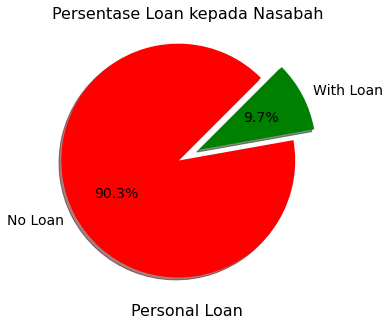

In [11]:
plt.figure(figsize=(5,5))

conversion_rate = komposisi.index
count = komposisi.values
colors= ['red','green']

plt.pie(count, labels=['No Loan','With Loan'],
        shadow=True,
        colors=colors, 
        autopct='%1.1f%%',
        startangle=45,
        explode=[0.2, 0],
        textprops={'fontsize': 14})

plt.title('Persentase Loan kepada Nasabah',fontsize=16)
plt.xlabel('Personal Loan',fontsize=16)
plt.axis('equal')
plt.show()



Observasi :

* 1. Sebanyak 4468 Nasabah atau sekitar 90.3%, tidak menerima loan dari Bank
* 2. Sebanyak 480 Nasabah atau sekitar 9,7%, menerima loan dari Bank

Data tidak seimbang, sehingga dalam Pembuatan Machine Learning, kita tidak memakai akurasi



## 5. Descriptive Statistic

In [12]:
# Masukakn Kolom kedalam variable 

numcols = ['Age', 'Experience', 'Income',  'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account',  'CD Account', 'Online', 'CreditCard']

In [13]:
df_new[numcols].describe()

Age   Experience       Income       Family      CCAvg  \
count  4948.000000  4948.000000  4948.000000  4948.000000  4948.0000   
mean     45.557195    20.331043    73.814470     2.391471     1.9359   
std      11.320735    11.311973    46.112596     1.148444     1.7477   
min      24.000000     0.000000     8.000000     1.000000     0.0000   
25%      36.000000    10.750000    39.000000     1.000000     0.7000   
50%      46.000000    20.000000    64.000000     2.000000     1.5000   
75%      55.000000    30.000000    98.000000     3.000000     2.6000   
max      67.000000    43.000000   224.000000     4.000000    10.0000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  4948.000000  4948.000000    4948.000000         4948.000000   
mean      1.878941    56.634398       0.097009            0.104285   
std       0.839745   101.828885       0.296000            0.305660   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

        CD Account       Online   CreditCard  
count  4948.000000  4948.000000  4948.000000  
mean      0.061035     0.597009     0.294058  
std       0.239418     0.490549     0.455664  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     1.000000     0.000000  
75%       0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

Observasi :

* Kolom `Securities Account`, `CD Account`, `Online`, `CreditCard` bertipe Boolean Yes/No (1/0)
* Kolom `Family`, `Education` bertipe kategorical ordinal
* Kolom `Age`, `Experience`, `CCAvg`, `Income` bertipe numeric
* Rata2 nasabah mendapatkan loan di umur 45 tahun dimana nasabah yang muda 24 tahun, dan paling tua 67 tahun
* Nasabah mempunyai rata2 pengalaman kerja 20 tahun dimana paling maksimal  43 tahun
* Rata2 `Income` adalah 73,81 ribu dollar, namun terdapat `income` terendah yaitu 8 ribu dollah dan paling tinggi 224 ribu dollar

In [14]:
# edu_bivariate = crosstab(X_train['Education'], X_train['Personal Loan'])

In [15]:
# Ubah kolom numeric dari kolom : Education, CD Account, Online,Securities Account, Personal Loan, CreditCard menjadi kategori
# untuk mudah dalam analisa 

df_eda = df_new_eda.copy()

In [16]:
#Dictionary Encoding 
def dct_encoding(df):
    
  #encoding educational requirement
    mapping_dictionary = {
        
                "Education" :
                    {
                        1 : "Undergrad degree",
                        2 : "Graduate",
                        3 : "Profesional"
                    },
                "CD Account":
                    {
                        1 : "Yes",
                        0 :"No"
                    },
                "Online":
                    {
                        1 : "Yes",
                        0 :"No"
                    },
                "Securities Account" :
                    {
                        1 : "Yes",
                        0 :"No"
                    },
                "Personal Loan":
                    {
                        1 : "Yes",
                        0 :"No"
                    },
                "CreditCard" :
                    {
                        1 : "Yes",
                        0 :"No"
                    }
     }
    
    df_eda.replace(mapping_dictionary , inplace=True)
    
    return df_eda

In [17]:
#Dictionary Encoding
df_eda = dct_encoding(df_eda)

## 6. Bivariate Analysis

Beberapa Hipotesis Pertanyaan yang kita akan diuji lewat plotting Exploratory Data Analysis : 

* Nasabah yang mempunyai Gaji yang tinggi, umumnya lebih mudah untuk Loan dibandingkan dengan gaji yang rendah
* Umur Nasabah di rentang 30 - 50, umumnya mendapatkan loan
* Nasabah yang mempunyai banyak anggota keluarga cenderung tidak mendapatkan loan
* Nasabah yang tingkat mendidikannya lebih tinggi lebih banyak mendapatkan loan

### Income Vs Personal Loan
Apakah peminjaman dari bank dipengaruhi oleh income nasabah ?

C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x720 with 0 Axes>

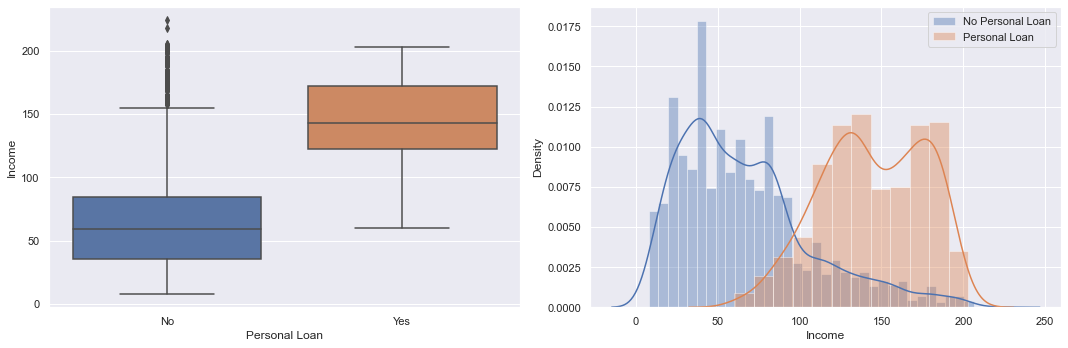

In [18]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.boxplot(y=df_eda['Income'], x=df_eda['Personal Loan'], ax=axes[0])
sns.distplot(df_eda['Income'][df_eda['Personal Loan']=='No'],hist=True,label='No Personal Loan', ax=axes[1])
sns.distplot(df_eda['Income'][df_eda['Personal Loan']=='Yes'],hist=True,label='Personal Loan', ax=axes[1])
plt.legend()
plt.tight_layout()

Observasi / interpretasi :

Terdapat perbedaan yang mencolok antara `Income` rendah dengan yang tinggi. `Income` mempunyai **pengaruh** dengan `Personal Loan`, dimana  `Income` yang tinggi lebih mempunyai peluang untuk mendapatkan Personal Loan

In [19]:
# df_eda[df_eda['Personal Loan']=='No'].sort_values(by='Income',ascending=False).head(10)

In [20]:
# df_eda[df_eda['Personal Loan']=='No'].sort_values(by='Income',ascending=False).head(10)

### CCAvg vs Personal Loan
Apakah Orang yang rutin memakai kartu kredit (pengeluaran banyak pada range tertentu (rutin)) dia cenderung mendapatkan loan ?

C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x720 with 0 Axes>

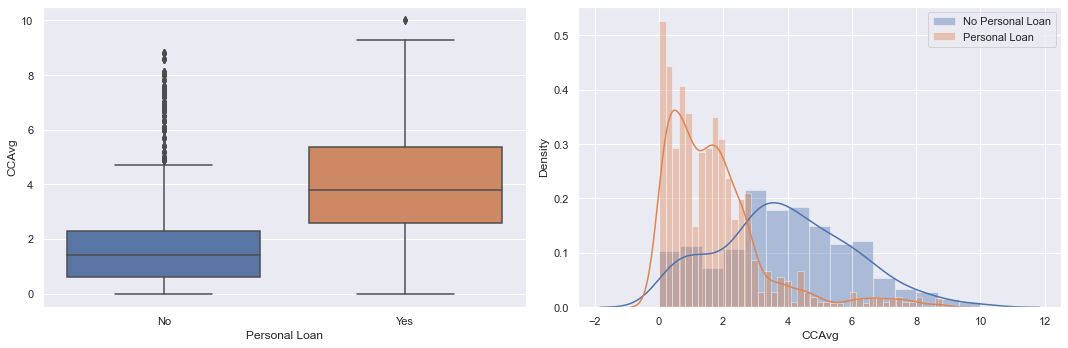

In [21]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.boxplot(y=df_eda['CCAvg'], x=df_eda['Personal Loan'], ax=axes[0])
sns.distplot(df_eda['CCAvg'][df_eda['Personal Loan']=='Yes'],hist=True,label='No Personal Loan', ax=axes[1])
sns.distplot(df_eda['CCAvg'][df_eda['Personal Loan']=='No'],hist=True,label='Personal Loan', ax=axes[1])
plt.legend()
plt.tight_layout()

Observasi

* bisa dikatakan `CCAvg` **berpengaruh** dengan `Personal Loan`, Nasabah yang mempunyai `CCAvg` yang tinggi berpeluang mendapatkan `Personal Loan`
* Orang yang senantiasa menggunakan kartu kredit dengan jumlah yang banyak (tertentu) maka dia cenderung untuk meminjam ke bank

In [22]:
# df_eda[df_eda['Personal Loan']=='Yes'].sort_values(by='CCAvg',ascending=True).head(10)

In [23]:
# df_eda[df_eda['Personal Loan']=='Yes'].sort_values(by=['CCAvg', 'Income'],ascending=[True,False]).head(10)

In [24]:
# # Sort descending order
# df.sort_values(by=['Fee','Discount'], inplace=True,
#                ascending = [True, False])

In [25]:
# df_eda[(df_eda['CCAvg']>=0) & (df_eda['Personal Loan']=='Yes')].head(100)

### CD Account vs Personal Loan
Apakah orang yang punya sertifikat deposito maka berpotensi mendapatkan pinjaman ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

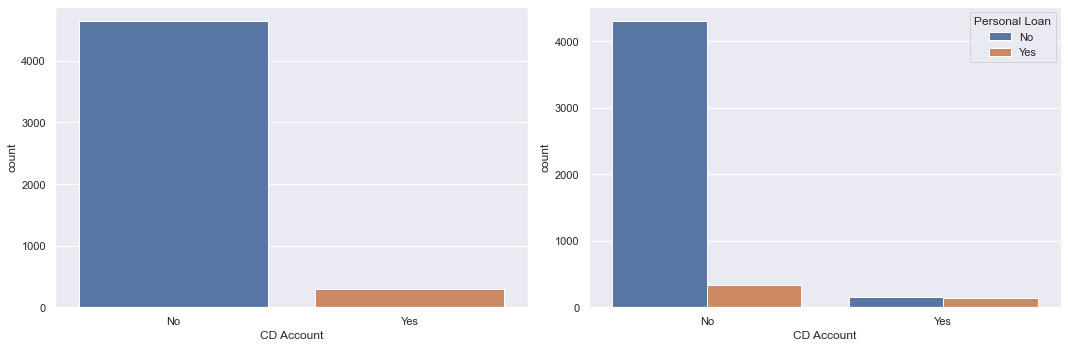

In [26]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.countplot(x=df_eda['CD Account'], ax=axes[0])
plt.legend()
sns.countplot(x='CD Account',data=df_eda,hue='Personal Loan', ax=axes[1])
plt.tight_layout()

Observasi :

* Dalam dataset ini mayoritas nasabah adalah **tidak mempunyai** `CD Account`
* Jumlah  tidak mendapatkan Personal Loan lebih banyak kepada nasabah yang tidak mempunyai `CD Account` .
* bisa dikatakan `CD Account` **bisa jadi mempengaruhi** dengan `Personal Loan`, namun hampir semua nasabah yang tidak mempunyai `CD Account` tidak mendapatkan `Personal Loan`.


In [27]:
# df_eda[(df_eda['CD Account']=='Yes') & (df_eda['Personal Loan']=='Yes')].head(100)

### Age Vs Personal Loan
Rentang usia berapa yang cenderung mendapat pinjaman ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

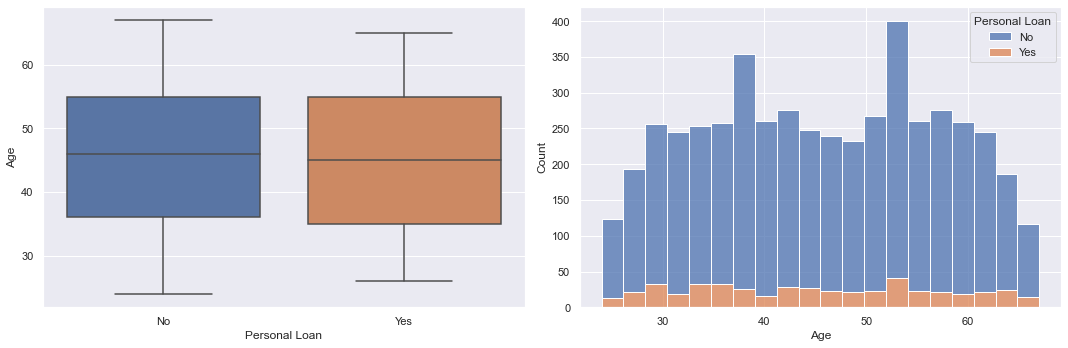

In [28]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.boxplot(y=df_eda['Age'], x= df_eda['Personal Loan'], ax=axes[0])
plt.legend()
sns.histplot(df_eda, x = 'Age', hue = 'Personal Loan', multiple = 'stack', ax=axes[1])
plt.tight_layout()

Observasi / interpretasi :

Tidak terdapat perbedaan yang mencolok sehingga bisa dikatakan `Age`  **tidak begitu berpengaruh** dengan `Personal Loan`, karena tidak terlalu ada perbedaan yang signifikan pada range umur tertentu untuk mendapatkan pinjaman dari bank.

Akan dilihat kembali menggunakan metode binning age, untuk melihat range umur mana yang lebih mendapatkan Personal Loan

### Experience vs Personal Loan
Apakah lama bekerja mempengaruhi pinjaman dari bank ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

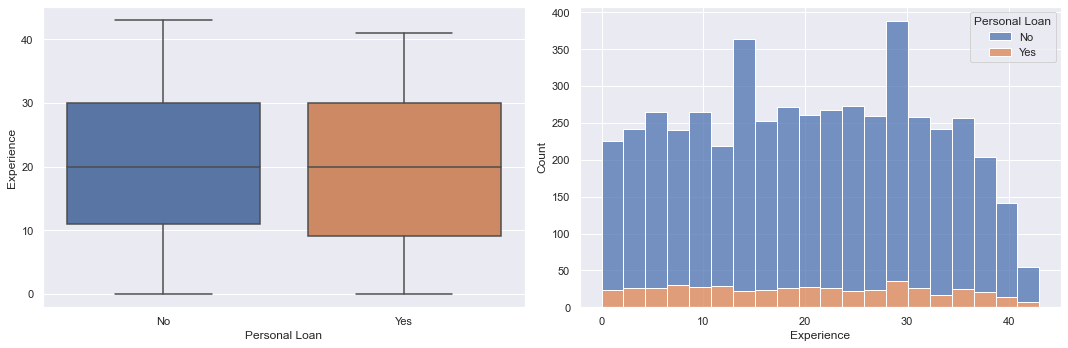

In [29]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.boxplot(y=df_eda['Experience'], x= df_eda['Personal Loan'], ax=axes[0])
plt.legend()
sns.histplot(df_eda, x = 'Experience', hue = 'Personal Loan', multiple = 'stack', ax=axes[1])
plt.tight_layout()

Observasi :

bisa dikatakan `Experience` **tidak berpengaruh** dengan `Personal Loan`, karena tidak terlalu ada perbedaan yang signifikan


Akan dilihat kembali menggunakan metode binning experience, untuk melihat range experience mana yang lebih mendapatkan Personal Loan

### Family vs Personal Loan
Apakah sedikit banyaknya jumlah anggota keluarga berpengaruh pada pinjaman dari bank ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

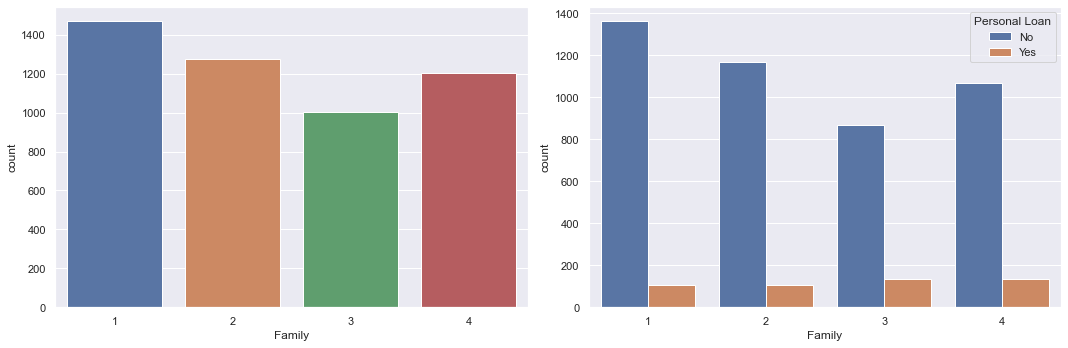

In [30]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.countplot(x=df_eda['Family'], ax=axes[0])
plt.legend()
sns.countplot(x='Family',data=df_eda,hue='Personal Loan', ax=axes[1])
plt.tight_layout()

Observasi 
* Jumlah anggota `Family` yang tidak mendapatkan Personal Loan lebih banyak di semua `family`.
* Jumlah anggota keluarga lebih dari 2 (3 dan 4 )cenderung untuk mendapatkan personal loan, selain itu jumlah yang tidak mendapatkan personal loan itu lebih sedikit pada anggota keluarga yang berjumlah 3 atau 4

In [31]:
# df_eda[(df_eda['Family']==3) & (df_eda['Personal Loan']=='Yes')].sort_values(by=['Income'],ascending=[True]).head(100)

### Education vs Personal Loan
Apakah tingkat pendidikan itu mempengaruhi pinjaman dari bank ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

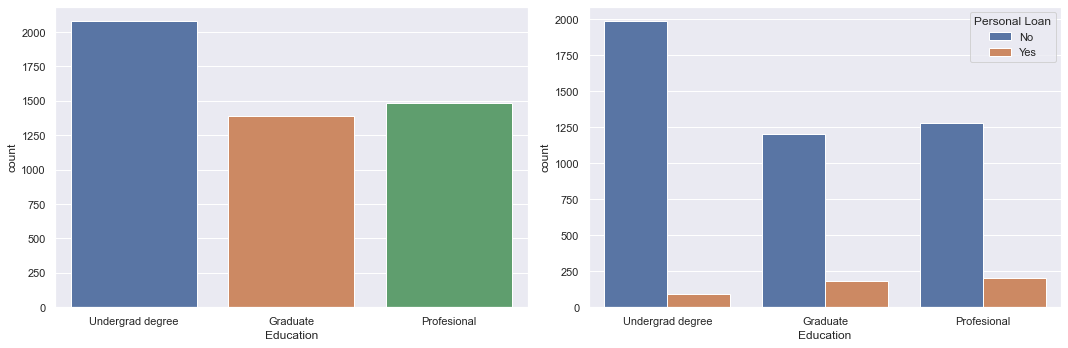

In [32]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.countplot(x=df_eda['Education'], ax=axes[0])
plt.legend()
sns.countplot(x='Education',data=df_eda,hue='Personal Loan', ax=axes[1])
plt.tight_layout()

Observasi :

1 = Undergrad degree
2 = Graduate
3 = Professional
* Dalam dataset ini mayoritas nasabah adalah undergrade
* Jumlah  tidak mendapatkan Personal Loan lebih banyak di semua `education`.
* bisa dikatakan `Education` **bisa jadi mempengaruhi** dengan `Personal Loan`,karena bisa dilihat dari `Education` Graduate maupun Profesional lebih cenderung mendapatkan Personal Loan

In [33]:
# df_eda[(df_eda['Education']=='Profesional') & (df_eda['Personal Loan']=='No')].sort_values(by=['Income'],ascending=[True]).head(100)

### Mortgage vs Personal Loan
1. Apakah orang yang banyak menggadaikan sesuatu maka dia berpotensi untuk menerima pinjaman ?

C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<Figure size 720x720 with 0 Axes>

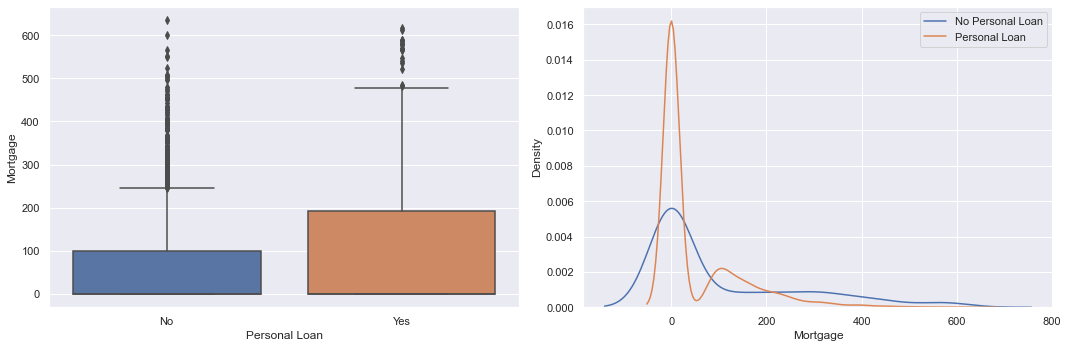

In [34]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.boxplot(y=df_eda['Mortgage'], x= df_eda['Personal Loan'], ax=axes[0])
sns.distplot(df_eda['Mortgage'][df_eda['Personal Loan']=='Yes'],hist=False,label='No Personal Loan', ax=axes[1])
sns.distplot(df_eda['Mortgage'][df_eda['Personal Loan']=='No'],hist=False,label='Personal Loan', ax=axes[1])
plt.legend()
plt.tight_layout()

Observasi

* bisa dikatakan `Mortgage` **berpengaruh** dengan `Personal Loan`, Customers yang mempunyai Mortgage tinggi mendapatkan Personal Loan
* Jika orang menggadai suatu barang, dari grafik boxplot dan density plot maka orang tersebut cenderung untuk meminjam uang ke bank

In [35]:
# df_eda[(df_eda['Mortgage']==0) & (df_eda['Personal Loan']=='Yes')].head(100)

In [36]:
# df_eda[(df_eda['Mortgage']==0) & (df_eda['Personal Loan']=='Yes') & (df_eda['Education']=='Undergrad degree')].sort_values(by=['Income'],ascending=[True]).head(100)

In [37]:
# df_eda[df_eda['Personal Loan']=='Yes'].sort_values(by=['CCAvg', 'Income'],ascending=[True,False]).head(10)

### Credit Card vs Personal Loan
Apakah orang yang punya kartu kredit maka dia mendapatkan pinjaman ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

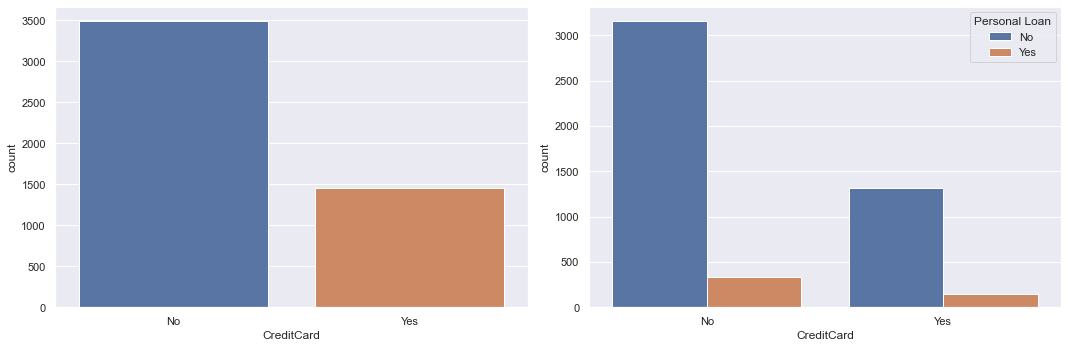

In [38]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.countplot(x=df_eda['CreditCard'], ax=axes[0])
plt.legend()
sns.countplot(x='CreditCard',data=df_eda,hue='Personal Loan', ax=axes[1])
plt.tight_layout()

Observasi :

* Dalam dataset ini mayoritas nasabah adalah **tidak mempunyai** `Credit Card`
* bisa dikatakan `Credit Card` **berpengaruh** dengan `Personal Loan`, Nasabah yang tidak mempunyai `Credit Card` hampir semua tidak mendapatkan `Personal Loan`,

In [39]:
# df_eda[(df_eda['CreditCard']=='No') & (df_eda['Personal Loan']=='Yes') & (df_eda['Education']=='Undergrad degree')].sort_values(by=['Income'],ascending=[True]).head(100)

### Securities Account vs Personal Loan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

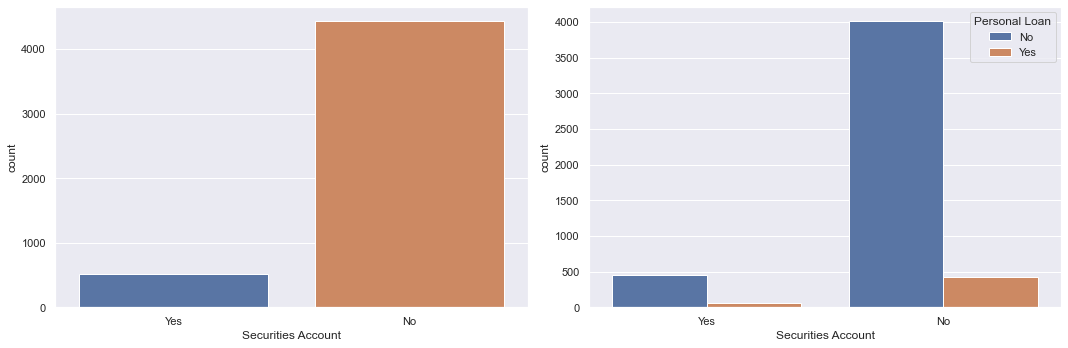

In [40]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.countplot(x=df_eda['Securities Account'], ax=axes[0])
plt.legend()
sns.countplot(x='Securities Account',data=df_eda,hue='Personal Loan', ax=axes[1])
plt.tight_layout()

Observasi :


* Dalam dataset ini mayoritas nasabah adalah **tidak mempunyai** `Securities Account`
* bisa dikatakan `Securities Account` **berpengaruh** dengan `Personal Loan`, Mayoritas nasabah yang tidak mendapatkan Personal Loan tidak mempunyai `Securities Account` 

### Online vs Personal Loan
1. Apakah nasabah yang menggunakan Online maka dia berpotensi mendapatkan pinjaman ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

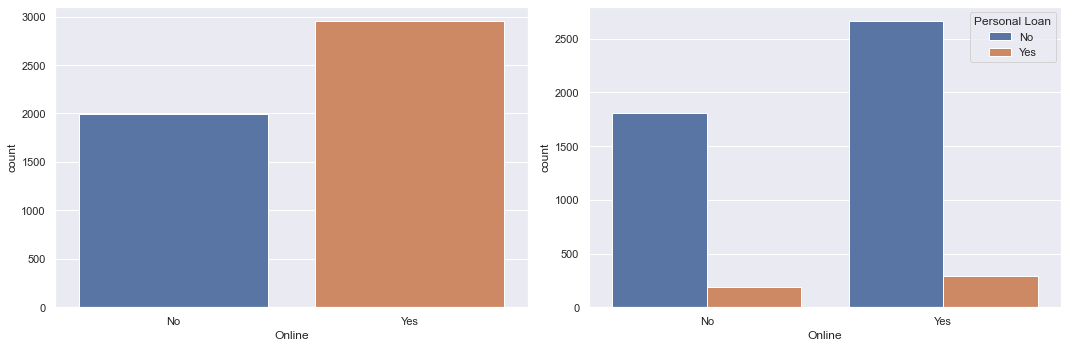

In [41]:
plt.figure(figsize=(10,10))

sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5

f, axes = plt.subplots(1, 2)
sns.countplot(x=df_eda['Online'], ax=axes[0])
plt.legend()
sns.countplot(x='Online',data=df_eda,hue='Personal Loan', ax=axes[1])
plt.tight_layout()

Observasi :


* Dalam dataset ini mayoritas nasabah adalah **mempunyai** Fasilitas `Online`
* bisa dikatakan `Online` **berpengaruh** dengan `Personal Loan`,

## 7. Univariate Analysis

Split Data menjadi train dan test

In [46]:
# Pakai metode Stratify akan mempertahankan proporsi target seperti pada dataset asli, juga pada dataset train dan test.
# Split data menjadi 80 Train: 20 Test
# pakai Dataframe original yang sudah menjadi numeric

X = df_new.drop('Personal Loan', axis=1).copy()
y = df_new['Personal Loan'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [43]:
# df_train, df_test = train_test_split(df_new,
#                                      test_size=0.2, random_state=42, stratify=y)

# X_train = df_train.loc[:, df_train.columns!='Personal Loan']
# y_train = df_train.loc[:, df_train.columns=='Personal Loan']

# X_test = df_test.loc[:, df_test.columns!='Personal Loan']
# y_test = df_test.loc[:, df_test.columns=='Personal Loan']

In [47]:
# Masukkan kolom 'Personal Loan' ke X_train dan X_test

X_train['Personal Loan'] = y_train
X_test['Personal Loan'] = y_test

In [48]:
# Hitung Persentasi dan jumlah baris pada X_train dan X_test

round((X_train['Personal Loan'].value_counts(normalize=True)*100),1)

0    90.3
1     9.7
Name: Personal Loan, dtype: float64

In [49]:
# Menghitung persentase data 'Personal Loan' pada X_test

round(((X_test['Personal Loan'].value_counts(normalize=True))*100),1)

0    90.3
1     9.7
Name: Personal Loan, dtype: float64

Data Train dan Test sudah mempunyai komposisi yang sama

#### Cek Outlier

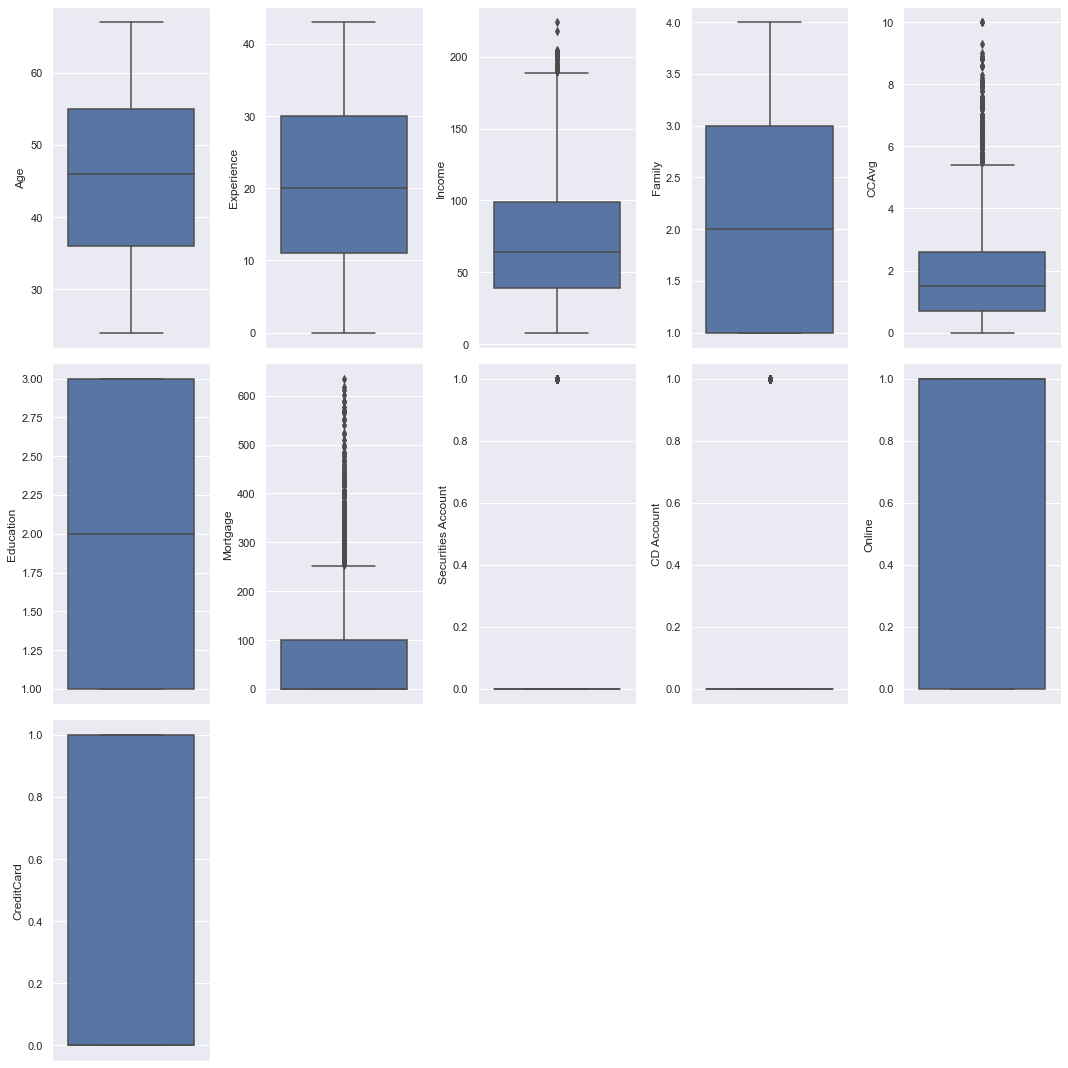

In [50]:
plt.figure(figsize = (15,15))
features = ['Age', 'Experience', 'Income',  'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',  'CD Account', 'Online', 'CreditCard']
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y = X_train[features[i]])
    plt.tight_layout()

observasi :
*  kolom `Income`, `CCAvg`, `Mortgage` terdapat outlier
*  kolom `Securities Account`, `CD Account`, terlihat data berkumpul dInilai 0 dan outlier nilai 1, namun kondisi ini normal, karena hanya berisi 0 dan 1

In [51]:
def outlier(df_new, column):
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    
    IQR = Q3-Q1
    low_limit = Q1 - (1.5 * IQR)
    up_limit =  Q3 + (1.5 * IQR)
    
    
    outlier_list = df[column].apply(lambda x:'outlier' if x<low_limit or x> up_limit else 'not - outlier')
    print(f"outlier low limit {low_limit} \n dan outlier up limit : {up_limit}")
    
    return outlier_list

#### analisa outlier `Income`, `CCAvg`, `Mortgage`

In [52]:
X_train['outlier_Income'] = outlier(X_train, 'Income')
X_train[X_train['outlier_Income'] == 'outlier'].sort_values(by='Income', ascending=False)

outlier low limit -51.0 
 dan outlier up limit : 189.0


Age  Experience  Income  Family     CCAvg  Education  Mortgage  \
3896   48          24     224       2  6.666667          1         0   
4993   45          21     218       2  6.666667          1         0   
2988   46          21     205       2  8.800000          1       181   
677    46          21     204       2  2.800000          1         0   
4225   43          18     204       2  8.800000          1         0   
...   ...         ...     ...     ...       ...        ...       ...   
53     50          26     190       3  2.100000          3       240   
1204   26           1     190       4  1.300000          2       197   
2841   37          11     190       4  7.300000          2       565   
1395   47          23     190       4  0.300000          3       305   
3312   47          22     190       2  8.800000          1         0   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  \
3896                   0           1       1           1              0   
4993                   0           0       1           0              0   
2988                   1           0       1           0              0   
677                    0           0       1           0              0   
4225                   0           0       1           0              0   
...                  ...         ...     ...         ...            ...   
53                     0           0       1           0              1   
1204                   0           0       1           0              1   
2841                   0           1       1           0              1   
1395                   0           0       0           0              1   
3312                   0           0       0           0              0   

     outlier_Income  
3896        outlier  
4993        outlier  
2988        outlier  
677         outlier  
4225        outlier  
...             ...  
53          outlier  
1204        outlier  
2841        outlier  
1395        outlier  
3312        outlier  

[68 rows x 13 columns]

Observasi :

* Berdasarkan data diatas, Beberapa nasabah ada yang incomenya lebih besar dari rata2 nasabah dan nilai tersebut memang benar adanya, sehingga nilainya tidak akan dihapus

In [53]:
X_train = X_train.drop('outlier_Income',axis=1)

In [54]:
X_train['outlier_CCAvg'] = outlier(X_train, 'CCAvg')
X_train[X_train['outlier_CCAvg'] == 'outlier'].sort_values(by='CCAvg', ascending=False)

outlier low limit -2.1500000000000004 
 dan outlier up limit : 5.45


Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
2337   43          16     201       1   10.0          2         0   
787    45          15     202       3   10.0          3         0   
2101   35           5     203       1   10.0          3         0   
3943   61          36     188       1    9.3          2         0   
3822   63          33     178       4    9.0          3         0   
...   ...         ...     ...     ...    ...        ...       ...   
3573   60          36     165       3    5.6          1         0   
299    41          15     159       1    5.5          3         0   
463    48          22     149       2    5.5          2         0   
4026   27           1     142       3    5.5          1         0   
3054   45          21     134       4    5.5          2         0   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  \
2337                   0           0       0           1              1   
787                    0           0       0           0              1   
2101                   0           0       0           0              1   
3943                   0           0       0           0              1   
3822                   0           0       0           0              1   
...                  ...         ...     ...         ...            ...   
3573                   0           0       0           1              1   
299                    0           1       1           0              1   
463                    1           1       1           0              1   
4026                   0           0       0           0              1   
3054                   0           1       1           1              1   

     outlier_CCAvg  
2337       outlier  
787        outlier  
2101       outlier  
3943       outlier  
3822       outlier  
...            ...  
3573       outlier  
299        outlier  
463        outlier  
4026       outlier  
3054       outlier  

[240 rows x 13 columns]

Observasi :

* Berdasarkan data diatas, Beberapa nasabah ada yang penggunaan Kartu kreditnya lebih besar dari rata2 nasabah dan nilai tersebut memang benar adanya, sehingga nilainya tidak akan dihapus

In [55]:
X_train = X_train.drop('outlier_CCAvg',axis=1)

In [56]:
X_train['outlier_Mortgage'] = outlier(X_train, 'Mortgage')
X_train[X_train['outlier_Mortgage'] == 'outlier'].sort_values(by='Mortgage', ascending=False)

outlier low limit -151.5 
 dan outlier up limit : 252.5


Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
2934   37          13     195       2    6.5          1       635   
303    49          25     195       4    3.0          1       617   
4812   29           4     184       4    2.2          3       612   
1783   53          27     192       1    1.7          1       601   
4842   49          23     174       3    4.6          2       590   
...   ...         ...     ...     ...    ...        ...       ...   
3117   42          16      65       3    0.5          3       256   
2159   61          35      99       1    4.8          3       255   
3138   36          11     103       1    4.6          1       255   
3950   38          14      62       1    1.5          3       255   
3948   37          12     123       4    3.1          2       253   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  \
2934                   0           0       1           0              0   
303                    0           0       0           0              1   
4812                   0           0       1           0              1   
1783                   0           0       1           0              0   
4842                   0           0       0           0              1   
...                  ...         ...     ...         ...            ...   
3117                   0           0       1           0              0   
2159                   0           0       0           1              1   
3138                   0           0       1           0              0   
3950                   0           0       1           0              0   
3948                   0           1       1           1              1   

     outlier_Mortgage  
2934          outlier  
303           outlier  
4812          outlier  
1783          outlier  
4842          outlier  
...               ...  
3117          outlier  
2159          outlier  
3138          outlier  
3950          outlier  
3948          outlier  

[229 rows x 13 columns]

Observasi :

* Berdasarkan data diatas, Beberapa nasabah ada yang nilai penggadaian (Mortgage) lebih besar dari rata2 nasabah dan nilai tersebut memang benar adanya, sehingga nilainya tidak akan dihapus

In [57]:
X_train = X_train.drop('outlier_Mortgage',axis=1)

Kesimpulan :

* Berdasarkan data diatas, Nilai Outlier dari kolom `Mortgage`, `Income`, `CCAvg` tersebut terlihat masih masuk akal dan tergolong wajar, sehingga nilai tersebut tidak akan dihapus

### Cek Sebaran Distribusi Nilai

C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Eky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

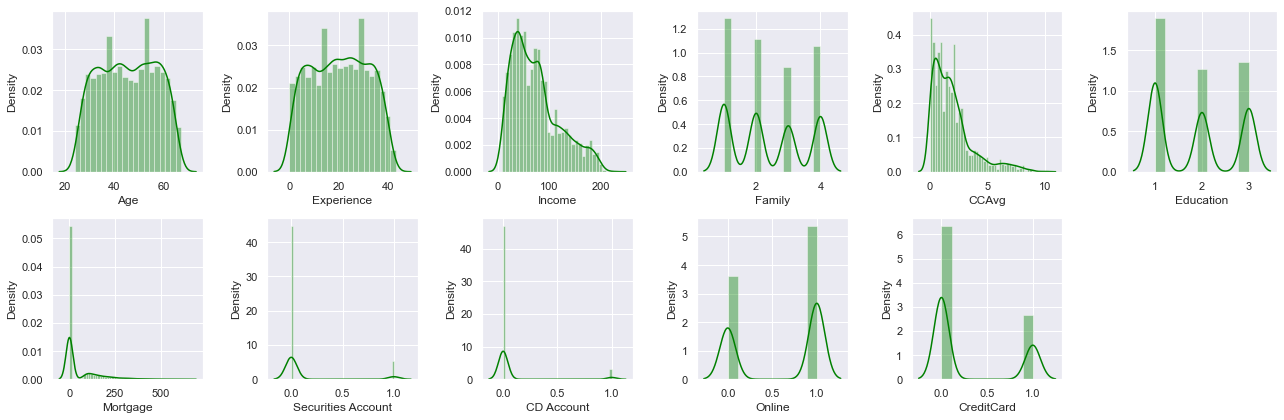

In [58]:
plt.figure(figsize=(18,6))
# features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    #sns.distplot(x=X_train[features[i]], color='green')
    sns.distplot(x=df_new[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()



Observasi :

* Kolom `Age`, `Experience`, hampir mempunyai distribusi normal
* Kolom, `Income`, `CCAvh` dan `Mortgage` mempunyai distribusi tidak normal positif skew
* Kolom  `Securities Account`, `CD Account` mempunyai distribusi terlalu extreme dengan banyak nilai 0
* Kolom `Online` dan `Credit Card`  hampir mempunyai distribusi sedikit seimbang


### 8. Multivariate Analysis

### Corelation Map

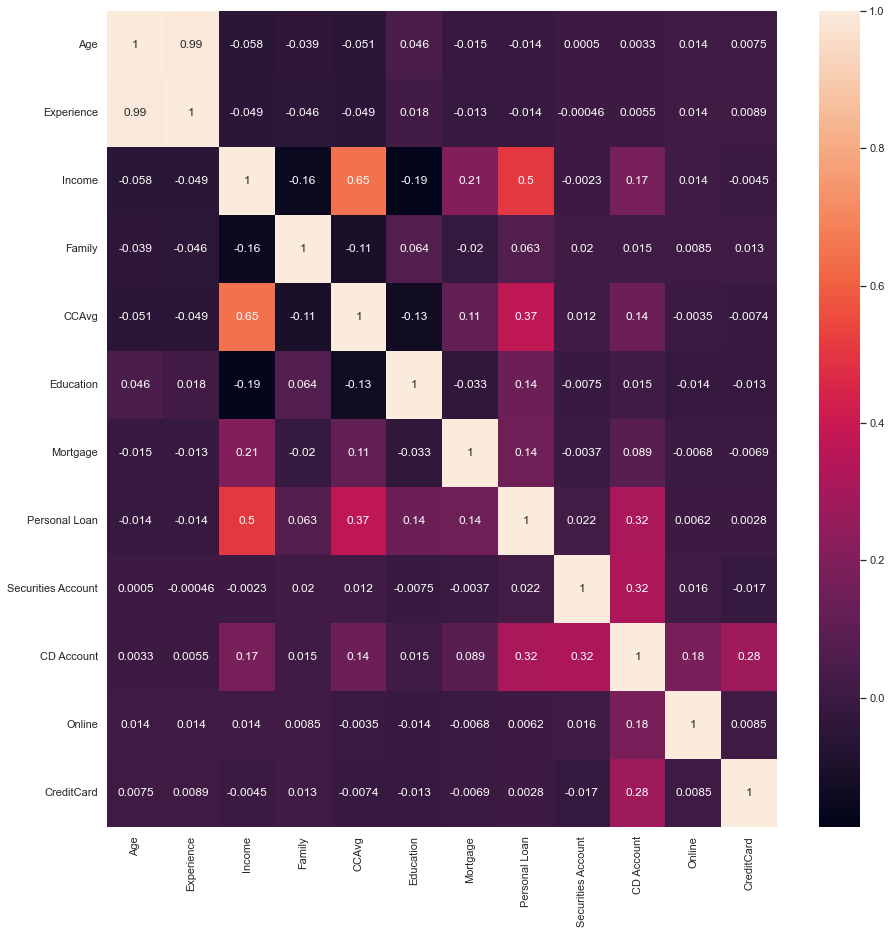

In [57]:
fig, ax = plt.subplots(figsize = (15,15))
# sns.heatmap(X_train.corr(),cbar=True,annot=True)
sns.heatmap(df_new.corr(),cbar=True,annot=True)
plt.show()

Observasi :

* Kolom `Income`, `CCAvg`, dan `CD Account` mempunyai korelasi baik dengan target
* Kolom `Age` dan `Experience` mempunyai korelasi yang sangat tinggi (0,99) namun dengan target korelasinya negatif  maka untuk kepentingan ML 2 feature ini akan dihapus
* Terdapat Feature yang korelasinya sangat rendah dengan target : `Securities Account` dan `Credit Card` dan `online`

* Beberapa feature akan kita drop dengan pengecekan feature selection

In [42]:
#sns.pairplot(X_train, hue='Personal Loan')
# sns.pairplot(df_new, hue='Personal Loan')
# plt.show()


### Deep Dive Question

In [59]:
# gunakan df_dq untuk menjawab beberapa pertanyaan ini
df_dq = df_eda.copy()

#### Bagaimana sebaran umur nasabah dalam data ini ?

In [60]:
def cat_age(x):
    if x<= 30:
        return '0-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'    
    else:
        return '60+'

df_dq['Kategori Usia'] = df_dq['Age'].apply(cat_age)

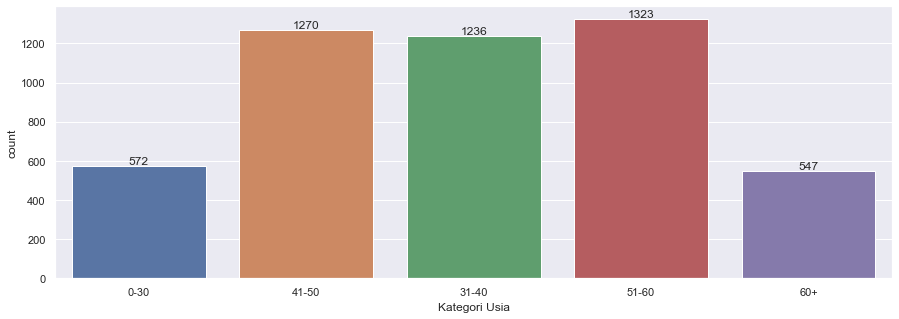

In [61]:
ax = sns.countplot(x='Kategori Usia', data=df_dq)
for container in ax.containers:
    ax.bar_label(container)

Terlihat bahwa  banyak nasabah pada rentang : 51-60, diikuti oleh 41-50 dan 31-40 

#### Range dari umur mana yang banyak mendapat Personal Loan  ?

In [103]:
#Function untuk plotting data categorical
def categorical_data(data,dataframe):
    plt.figure(figsize=(30,15))
    color  = ['red', 'green']
#     g=sns.catplot(x=data,kind='count', hue="Personal Loan", palette='viridis', data=dataframe)
    g=sns.catplot(x=data,kind='count', hue="Personal Loan", palette=color, data=dataframe)
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + 0, 
            p.get_height() * 1.01, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='45', size='large')
       ax.tick_params(axis='x', rotation=45)
    plt.show()

<Figure size 2160x1080 with 0 Axes>

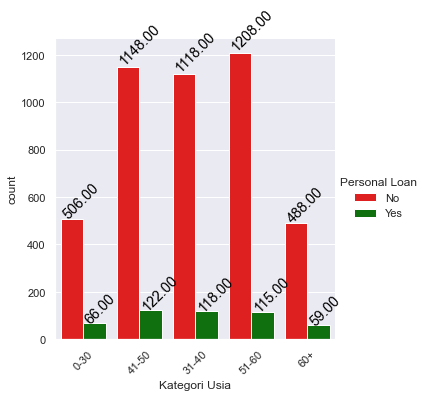

In [104]:
categorical_data("Kategori Usia",df_dq)

Bisa dilihat pada range usia 41-50, 31-40 dan 51-60 berpeluang besar mendapat Personal Loan, sementara bagi rentang usia 30 dan > 60 peluangnya rendah. Sehingga bagi yang peluangnya rendah perlu strategi lain supaya mereka juga bisa mendapatkan Loan, misal dengan sosialisasi pentingnya deposit Account

In [222]:
# df_dq[(df_dq['Kategori Usia'].isin(['0-30','60+'])) & (df_dq['Personal Loan']=='No')].sort_values(by=['CCAvg'],ascending=[False]).head(500)

In [214]:
df_no_usia = df_dq[(df_dq['Kategori Usia'].isin(['0-30','60+'])) & (df_dq['Personal Loan']=='No')].sort_values(by=['Income'],ascending=[False]).head(100)

In [147]:
# df_no_usia.groupby(['Kategori Usia','Education',  'CD Account']).agg({'ID':'count'}).reset_index()

In [134]:
# df_no_usia[df_no_usia['Mortgage']==0].count()

In [211]:
# df_no_usia1 = df_dq[(df_dq['Personal Loan']=='No')].sort_values(by=['Income'],ascending=[False]).head(100)

In [219]:
# pd.set_option('display.max_rows', None)
# df_no_usia.groupby(['Kategori Usia','Income', 'Education', 'CCAvg', 'Family', 'CD Account']).agg({'ID':'count'}).reset_index()

In [354]:
pd.set_option('display.max_rows', None)
df_no_usia.groupby(['Kategori Usia','Education',  'Family', 'CD Account']).agg({'ID':'count'}).reset_index()

Kategori Usia         Education  Family CD Account  ID
0          0-30  Undergrad degree       1         No  31
1          0-30  Undergrad degree       2         No  27
2           60+  Undergrad degree       1         No  25
3           60+  Undergrad degree       1        Yes   2
4           60+  Undergrad degree       2         No  14
5           60+  Undergrad degree       2        Yes   1

#### Income berapa yang berpeluang tinggi mendapatkan Personal Loan ?

In [158]:
df_dq['Personal Loan_cat'] = df_dq['Personal Loan'].replace(['Yes','No'],[1,0])

In [200]:
def income_range(x):
    if x <= 50:
        return '0-50'
    elif x <= 100:
        return '51-100'
    elif x <= 150:
        return '101-150'
    elif x <= 200:
        return '151-200'
    else:
        return '>200'

df_dq['Income_bin'] = df_dq['Income'].apply(income_range)

In [160]:
# rata_income = (Income_Loan_Yes.groupby('Income_bin')['Personal Loan'].count())
# rata_income = pd.DataFrame(rata_income, columns=['Range Income', 'Jumlah'])
# rata_income=[]
rata_income = (df_dq.groupby('Income_bin')['Personal Loan_cat'].mean()*100)
# rata_income1 = (df_dq.groupby('Income_bin')['Personal Loan'].mean()*100).reset_index()
# rata_income = pd.DataFrame(rata_income)
# rata_income.sort_values('Income_bin',ascending=True)
rata_income


Income_bin
0-50        0.000000
101-150    29.062087
151-200    50.469484
51-100      2.262931
>200       18.750000
Name: Personal Loan_cat, dtype: float64

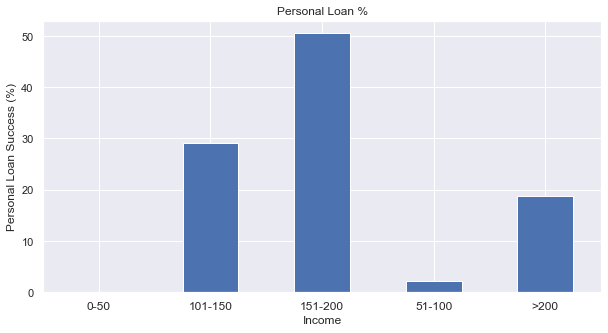

In [161]:
plt.figure(figsize=(10, 5))
rata_income.plot(kind='bar')
plt.title('Personal Loan %')
plt.xlabel('Income', fontsize=12)
plt.ylabel('Personal Loan Success (%)', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.show()


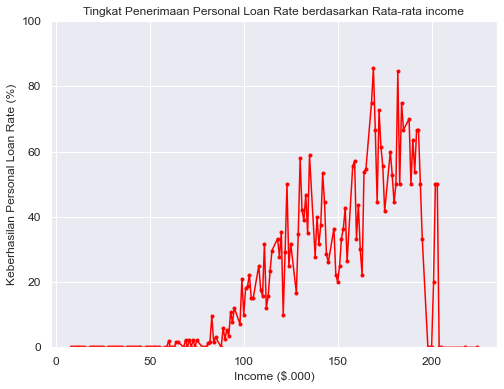

In [162]:
percentage = df_dq.groupby('Income')['Personal Loan_cat'].mean()*100
plt.figure(figsize = (8,6))
percentage.plot(kind='line', color = 'red', marker='.')
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Income ($.000)', fontsize=12)
plt.ylabel('Keberhasilan Personal Loan Rate (%)', fontsize=12)
plt.title('Tingkat Penerimaan Personal Loan Rate berdasarkan Rata-rata income')
plt.ylim(0,100)
plt.show()


<Figure size 2160x1080 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


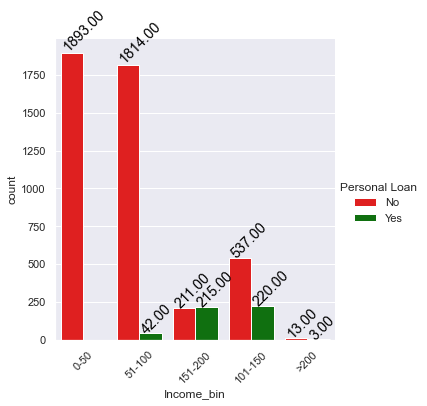

In [201]:
categorical_data("Income_bin",df_dq)

Nasabah yang mempunyai annual Income di range 100 s.d.200  berpotensi tinggi untuk mendapatkan Personal Loan. sementara bagi rentang > 200  malah peluangnya rendah.   
Sehingga bagi yang peluangnya rendah perlu strategi lain supaya mereka juga bisa mendapatkan Loan, misal dengan sosialisasi pentingnya deposit Account, pemberian bonus apabila penggunaan kartu kredit perbulan lebih dari > 5

Dalam kasus ini salah satu syarat batas minimal Income untuk mengikuti persyaratan Personal adalah 60 (Sesuai EDA)

In [245]:
# df_dq[(df_dq['Income_bin']=='51-100') & (df_dq['Personal Loan']=='No')].sort_values(by=['Income'],ascending=[True]).head(100)

In [244]:
# df_dq[(df_dq['Personal Loan']=='No')].sort_values(by=['Income'],ascending=[True]).head(100)

In [243]:
df_Income_bin_no  = df_dq[(df_dq['Income_bin'].isin(["0-50", "51-100", ">200"])) & (df_dq['Personal Loan']=='No')].sort_values(by=['Income'],ascending=[True])

In [344]:
pd.set_option('display.max_rows', None)
df_Income_bin_no.groupby(['Income_bin','Education', 'Mortgage', 'CCAvg', 'Family', 'CD Account']).agg({'ID':'count'}).reset_index()

Income_bin         Education  Mortgage     CCAvg  Family CD Account  ID
0          0-50          Graduate         0  0.000000       4         No   9
1          0-50          Graduate         0  0.100000       1         No  12
2          0-50          Graduate         0  0.100000       2         No   5
3          0-50          Graduate         0  0.100000       2        Yes   1
4          0-50          Graduate         0  0.100000       3         No  17
5          0-50          Graduate         0  0.100000       3        Yes   3
6          0-50          Graduate         0  0.200000       3         No   8
7          0-50          Graduate         0  0.200000       4         No   7
8          0-50          Graduate         0  0.300000       2         No  16
9          0-50          Graduate         0  0.300000       4         No   6
10         0-50          Graduate         0  0.400000       1         No   5
11         0-50          Graduate         0  0.400000       3         No   7
12         0-50          Graduate         0  0.400000       4         No  12
13         0-50          Graduate         0  0.500000       1         No   6
14         0-50          Graduate         0  0.500000       2         No   6
15         0-50          Graduate         0  0.500000       3         No  14
16         0-50          Graduate         0  0.500000       4         No   7
17         0-50          Graduate         0  0.600000       3         No  10
18         0-50          Graduate         0  0.600000       4         No  11
19         0-50          Graduate         0  0.600000       4        Yes   1
20         0-50          Graduate         0  0.666667       3         No   6
21         0-50          Graduate         0  0.700000       2         No   9
22         0-50          Graduate         0  0.700000       3         No  10
23         0-50          Graduate         0  0.700000       4         No  14
24         0-50          Graduate         0  0.800000       1         No   5
25         0-50          Graduate         0  0.900000       4         No   7
26         0-50          Graduate         0  1.000000       2         No  14
27         0-50          Graduate         0  1.000000       2        Yes   2
28         0-50          Graduate         0  1.000000       3         No  23
29         0-50          Graduate         0  1.000000       4         No   6
30         0-50          Graduate         0  1.100000       2         No   2
31         0-50          Graduate         0  1.100000       3         No   4
32         0-50          Graduate         0  1.100000       4         No   3
33         0-50          Graduate         0  1.200000       1         No   4
34         0-50          Graduate         0  1.200000       4         No   9
35         0-50          Graduate         0  1.300000       1         No   9
36         0-50          Graduate         0  1.300000       3         No   6
37         0-50          Graduate         0  1.300000       4         No   4
38         0-50          Graduate         0  1.400000       2         No   4
39         0-50          Graduate         0  1.500000       1         No  13
40         0-50          Graduate         0  1.500000       1        Yes   2
41         0-50          Graduate         0  1.500000       4         No   5
42         0-50          Graduate         0  1.600000       1         No   3
43         0-50          Graduate         0  1.666667       2         No   4
44         0-50          Graduate         0  1.666667       2        Yes   1
45         0-50          Graduate         0  1.700000       2         No   4
46         0-50          Graduate         0  1.700000       3         No   6
47         0-50          Graduate         0  1.700000       4         No   5
48         0-50          Graduate         0  1.800000       1         No   6
49         0-50          Graduate         0  1.900000       1         No   6
50         0-50          Graduate         0  1.900000       2         No   2
5

#### Bagaimana Pengaruh CCAvg terhadap Personal Loan ?

In [251]:
def cc_range(x):
    if x <= 2:
        return '0-2'
    elif x <= 4:
        return '3-4'
    elif x <= 6:
        return '5-6'
    elif x <= 8:
        return '7-8'
    else:
        return '>9'

df_dq['CCAvg_bin'] = df_dq['CCAvg'].apply(cc_range)

In [258]:
rata_cc = (df_dq.groupby('CCAvg_bin')['Personal Loan_cat'].mean()*100)
# rata_income1 = (df_dq.groupby('Income_bin')['Personal Loan'].mean()*100).reset_index()
# rata_income = pd.DataFrame(rata_income)
# rata_income.sort_values('Income_bin',ascending=True)
rata_cc


CCAvg_bin
0-2     2.986932
3-4    13.708999
5-6    46.925566
7-8    31.472081
>9     35.897436
Name: Personal Loan_cat, dtype: float64

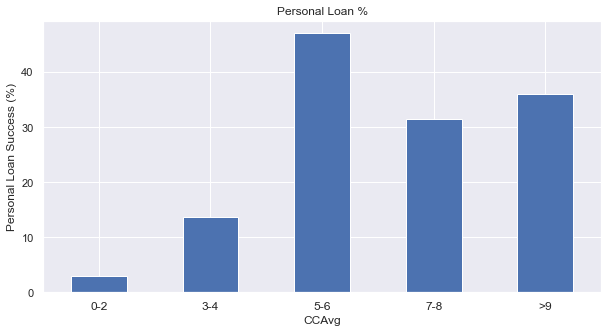

In [259]:
plt.figure(figsize=(10, 5))
rata_cc.plot(kind='bar')
plt.title('Personal Loan %')
plt.xlabel('CCAvg', fontsize=12)
plt.ylabel('Personal Loan Success (%)', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.show()


<Figure size 2160x1080 with 0 Axes>

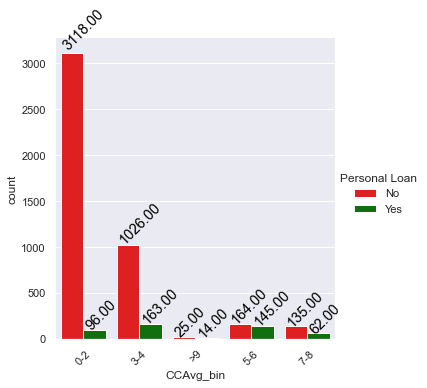

In [252]:
categorical_data("CCAvg_bin",df_dq)

Berdasarkan data diatas terlihat bahwa, Nasabah yang penggunaan kartu kredit bulananan di range > 5 grafik ke 1 berpotensi tinggi untuk mendapatkan Personal Loan, meskipun jika dilihat range 5-6 di grafik ke 2 nampak lebih sedikit peluang personal Loan dibanding dengan range 3-4. Karena jika mengambil range 3-4 di grafik ke 2, nasabah yang tidak mendapatkan personal Loan jauh lebih banyak dibanding dengan range 5-6.

In [253]:
# df_CCAvg_bin_no  = df_dq[(df_dq['CCAvg_bin'].isin(["7-8", ">9", "0-2", "3-4"])) & (df_dq['Personal Loan']=='No')].sort_values(by=['Income'],ascending=[True])

In [257]:
# pd.set_option('display.max_rows', None)
# df_CCAvg_bin_no.groupby(['CCAvg_bin', 'Income_bin', 'CD Account', 'CreditCard']).agg({'ID':'count'}).reset_index()

Nasabah yang penggunaan CC di range > 5  berpotensi tinggi untuk mendapatkan Personal Loan

#### Bagaimana Pengaruh CD Account terhadap Personal Loan

In [273]:
# df_dq['CD Account_cat']= df_dq['CD Account'].replace(['Yes','No'],[1,0])

In [271]:
CD_loan = (df_dq.groupby('CD Account',as_index=True)['Personal Loan_cat'].mean()*100)
CD_loan

CD Account
No      7.318123
Yes    46.357616
Name: Personal Loan_cat, dtype: float64

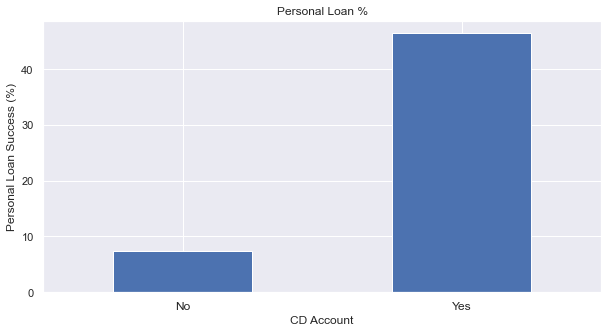

In [272]:
plt.figure(figsize=(10, 5))
CD_loan.plot(kind='bar')
plt.title('Personal Loan %')
plt.xlabel('CD Account', fontsize=12)
plt.ylabel('Personal Loan Success (%)', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.show()


Nasabah yang memunyai Certificate Deposit tinggi untuk mendapatkan Personal Loan dibandingkan dengan yang tidak.

#### Bagaimana Pengaruh Mortgage terhadap Personal Loan

In [277]:
def mortgage_range(x):
    if x <= 100:
        return '0-100'
    elif x <= 200:
        return '101-200'
    elif x <= 300:
        return '201-300'
    elif x <= 400:
        return '301-400'
    elif x <= 500:
        return '401-500'
    else:
        return '>200'

df_dq['Mortgage_bin'] = df_dq['Mortgage'].apply(mortgage_range)

In [278]:
mortgage_loan = (df_dq.groupby('Mortgage_bin', as_index=True)
           ['Personal Loan_cat'].mean()*100)
mortgage_loan

Mortgage_bin
0-100       8.783784
101-200     5.158730
201-300    13.651877
301-400    31.746032
401-500    41.666667
>200       64.000000
Name: Personal Loan_cat, dtype: float64

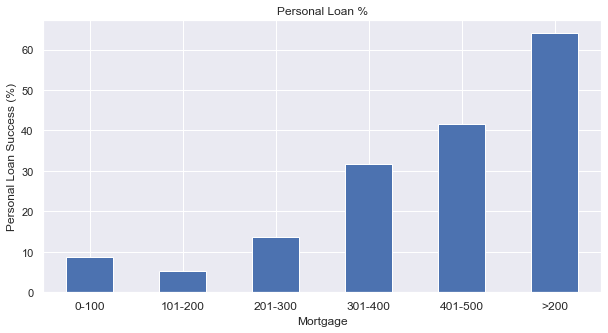

In [280]:
plt.figure(figsize=(10, 5))
mortgage_loan.plot(kind='bar')
plt.title('Personal Loan %')
plt.xlabel('Mortgage', fontsize=12)
plt.ylabel('Personal Loan Success (%)', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.show()

<Figure size 2160x1080 with 0 Axes>

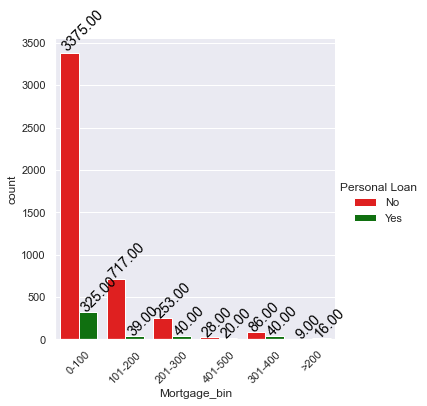

In [281]:
categorical_data("Mortgage_bin",df_dq)

Nasabah yang mempunyai Mortgage > 200 berpotensi untuk mendapatkan Personal Loan. sementara bagi rentang < 200  peluangnya rendah.   
Sehingga bagi yang peluangnya rendah perlu strategi lain supaya mereka juga bisa mendapatkan Loan, misal dengan sosialisasi pentingnya deposit Account, pemberian bonus apabila penggunaan kartu kredit perbulan lebih dari > 5

#### Bagaimana Pengaruh Education terhadap Personal Loan

In [266]:
Education_loan = (df_dq.groupby('Education', as_index=True)
           ['Personal Loan_cat'].mean()*100)
Education_loan

Education
Graduate            13.121846
Profesional         13.841999
Undergrad degree     4.471154
Name: Personal Loan_cat, dtype: float64

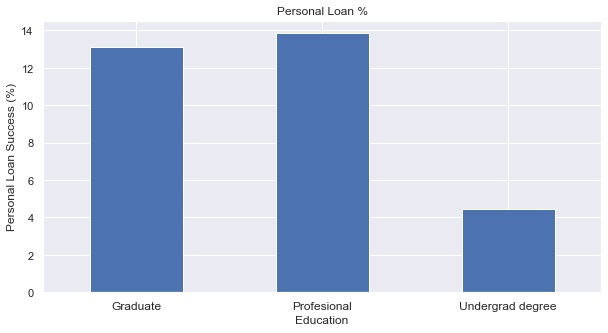

In [267]:
plt.figure(figsize=(10, 5))
Education_loan.plot(kind='bar')
plt.title('Personal Loan %')
plt.xlabel('Education', fontsize=12)
plt.ylabel('Personal Loan Success (%)', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.show()


pada kolom `Education` pada level profesional berpotensi untuk Personal Loan

#### Bagaimana Pengaruh Family terhadap Personal Loan

In [275]:
Family_loan = (df_dq.groupby('Family', as_index=True)
           ['Personal Loan_cat'].mean()*100)
Family_loan

Family
1     7.278912
2     8.320251
3    13.286713
4    11.138820
Name: Personal Loan_cat, dtype: float64

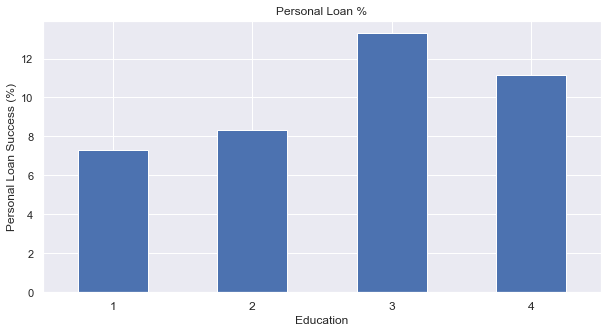

In [276]:
plt.figure(figsize=(10, 5))
Family_loan.plot(kind='bar')
plt.title('Personal Loan %')
plt.xlabel('Education', fontsize=12)
plt.ylabel('Personal Loan Success (%)', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.show()

#### Kesimpulan sementara

Dalam rangka menyukseskan program Personal Loan, pihak Bank dapat mencari nasabah dengan karakteristik :
* Income di range 100 s.d 200 
* Diutamakan nasabah yang mempunyai CD Account
* Penggunaan biaya bulanan kartu kredit di range >= 5 ($ 000)
* Tingkat pendidikan (Education) diutamakan Profesional kemudian Graduade 
* Mempunyai Anggota Keluarga >= 3 orang

### Berdasarkan beberapa Observasi EDA dan Deep Question:

* Nasabah yang incomenya lebih di range 100  s.d 200 (($ 000) berpotensi besar untuk menerima Personal Loan, nasabah yang incomenya lebih kecil dari 60K dipastikan hampir tidak menerima personal Loan

* Nasabah yang mempunyai CD Account berpotensi besar untuk menerima Personal Loan

**Rekomendasi 1**
Bank dapat fokus nasabah yang mempunyai income 100K s.d 200K atau/dengan Certificate of Deposit Account di bank
=====================================================================================================================
* Nasabah yang penggunaan Kartu Kredit Bulanan lebih dari 5 ($ 000) atau lebih  berpotensi besar untuk menerima Personal Loan, 

* Nasabah yang mempunyai anggota keluarga 3 / 4 berpotensi untuk menerima Personal Loan

* Nababah yang tingkat pendidikannya Graduate / Profesional berpotensi untuk menerima Personal Loan dibandingkan dengan undergrade

**Rekomendasi 2**

Bank dapat fokus dengan nasabah dengan penggunaan kartu kredit bulanan > 5 ($ 000) atau/dengan anggota keluarga 3/4 atau/dengan pendidikan graduate/profesional

=====================================================================================================================

**Rekomendasi 3**

* Nasabah yang tidak dapat Personal Loan sebelumnya
* Nasabah yang penggunaannya kartu kredit bulanan < 5 

Bank agar dapatnya memberikan sosialisasi terhadap nasabah untuk membuat Certificate of Deposit dan memberikan bonus/voucer belanja kepada nasabah yang penggunaan kartu kredit bulanan diatas >5 ( $000)

 


### Data Preprocessing
### 9. Feature Selection

Pakai dataframe asli

In [285]:
# Pakai metode Stratify akan mempertahankan proporsi target seperti pada dataset asli, juga pada dataset train dan test.
# Split data menjadi 80 Train: 20 Test

X = df_new.drop('Personal Loan', axis=1).copy()
y = df_new['Personal Loan'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [286]:
# Masukkan kolom 'Personal Loan' ke X_train dan X_test

X_train['Personal Loan'] = y_train
X_test['Personal Loan'] = y_test

In [287]:
# Hitung Persentasi dan jumlah baris pada X_train dan X_test

round((X_train['Personal Loan'].value_counts(normalize=True)*100),1)

0    90.3
1     9.7
Name: Personal Loan, dtype: float64

In [288]:
# Menghitung persentase data 'Personal Loan' pada X_test

round(((X_test['Personal Loan'].value_counts(normalize=True))*100),1)

0    90.3
1     9.7
Name: Personal Loan, dtype: float64

In [289]:
X_train_fs = X_train.copy()

In [290]:
X_train_fs = X_train_fs.drop('Personal Loan',axis=1)
X_test = X_test.drop('Personal Loan',axis=1)

In [291]:
X_train_fs.head(10)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
3294   42          12      29       3    2.0          3         0   
1616   48          23      84       4    3.1          2         0   
60     49          24      39       3    1.7          2         0   
1261   63          39      84       1    1.8          3         0   
4694   39          13      25       2    0.8          3         0   
142    33           9      48       1    2.1          3         0   
1944   52          28      39       3    1.9          2        83   
2785   34           9      31       4    1.1          3        85   
3907   40          14      42       2    0.3          1       187   
1499   52          26      91       1    4.3          2         0   

      Securities Account  CD Account  Online  CreditCard  
3294                   0           0       0           0  
1616                   1           1       1           0  
60                     1           0       1           0  
1261                   0           0       0           0  
4694                   0           0       0           0  
142                    0           0       0           1  
1944                   0           1       1           1  
2785                   1           1       1           1  
3907                   0           0       1           0  
1499                   0           1       1           1

In [292]:
# Feature Selection Hapus Kolom Experience, Age, dan CreditCard di X_train
X_train_ml = X_train_fs.drop(['Experience','Age','Securities Account'],axis=1)
X_train_ml.head()

Income  Family  CCAvg  Education  Mortgage  CD Account  Online  \
3294      29       3    2.0          3         0           0       0   
1616      84       4    3.1          2         0           1       1   
60        39       3    1.7          2         0           0       1   
1261      84       1    1.8          3         0           0       0   
4694      25       2    0.8          3         0           0       0   

      CreditCard  
3294           0  
1616           0  
60             0  
1261           0  
4694           0

In [293]:
# Feature Selection Hapus Kolom Experience, Age, dan CreditCard di X_test
X_test_ml = X_test.copy()
X_test_ml = X_test_ml.drop(['Experience', 'Age', 'Securities Account'], axis=1)



### 10. Feature Scaling

Agar Range data tidak terlalu jauh, maka Kolom akan dilakukan feature scaling sehingga mudah diproses oleh ML


In [294]:
scaler = StandardScaler()

In [295]:
X_train_ml_scaler = X_train_ml.copy()
X_test_ml_scaler = X_test_ml.copy()

In [296]:
X_train_ml_scaler.head(10)

Income  Family  CCAvg  Education  Mortgage  CD Account  Online  \
3294      29       3    2.0          3         0           0       0   
1616      84       4    3.1          2         0           1       1   
60        39       3    1.7          2         0           0       1   
1261      84       1    1.8          3         0           0       0   
4694      25       2    0.8          3         0           0       0   
142       48       1    2.1          3         0           0       0   
1944      39       3    1.9          2        83           1       1   
2785      31       4    1.1          3        85           1       1   
3907      42       2    0.3          1       187           0       1   
1499      91       1    4.3          2         0           1       1   

      CreditCard  
3294           0  
1616           0  
60             0  
1261           0  
4694           0  
142            1  
1944           1  
2785           1  
3907           0  
1499           1

In [297]:
X_test_ml_scaler.head(10)

Income  Family  CCAvg  Education  Mortgage  CD Account  Online  \
3385      73       4    0.4          1         0           0       0   
3788      82       2    2.5          1       221           0       1   
3518     129       2    6.0          1         0           0       0   
191       29       1    0.3          3       140           0       0   
2872      23       1    0.3          1         0           0       0   
1457      25       2    0.8          3         0           0       0   
3145     114       3    3.3          3         0           0       0   
2971      43       3    1.0          2       165           1       1   
3374      61       1    2.2          3         0           0       0   
119      112       1    4.6          1       366           0       0   

      CreditCard  
3385           0  
3788           1  
3518           0  
191            0  
2872           0  
1457           1  
3145           0  
2971           1  
3374           0  
119            0

In [298]:
features = ['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CreditCard', 'CD Account', 'Online']

In [299]:
X_train_ml_scaler[features] = scaler.fit_transform(X_train_ml_scaler[features])
X_test_ml_scaler[features] = scaler.transform(X_test_ml_scaler[features])

In [300]:
X_test_ml_scaler.head()

Income    Family     CCAvg  Education  Mortgage  CD Account    Online  \
3385 -0.024437  1.397475 -0.883638  -1.035854 -0.559310   -0.259102 -1.231995   
3788  0.170788 -0.344363  0.315562  -1.035854  1.627876   -0.259102  0.811692   
3518  1.190296 -0.344363  2.314230  -1.035854 -0.559310   -0.259102 -1.231995   
191  -0.978870 -1.215282 -0.940743   1.344355  0.826238   -0.259102 -1.231995   
2872 -1.109020 -1.215282 -0.940743  -1.035854 -0.559310   -0.259102 -1.231995   

      CreditCard  
3385   -0.650167  
3788    1.538066  
3518   -0.650167  
191    -0.650167  
2872   -0.650167

In [301]:
X_test_ml_scaler['Online'].value_counts()

 0.811692    568
-1.231995    422
Name: Online, dtype: int64

In [302]:
X_train_ml_scaler.head()

Income    Family     CCAvg  Education  Mortgage  CD Account    Online  \
3294 -0.978870  0.526556  0.030038   1.344355  -0.55931   -0.259102 -1.231995   
1616  0.214171  1.397475  0.658191   0.154251  -0.55931    3.859480  0.811692   
60   -0.761954  0.526556 -0.141276   0.154251  -0.55931   -0.259102  0.811692   
1261  0.214171 -1.215282 -0.084171   1.344355  -0.55931   -0.259102 -1.231995   
4694 -1.065637 -0.344363 -0.655219   1.344355  -0.55931   -0.259102 -1.231995   

      CreditCard  
3294   -0.650167  
1616   -0.650167  
60     -0.650167  
1261   -0.650167  
4694   -0.650167

In [303]:
X_train_ml_scaler.count()

Income        3958
Family        3958
CCAvg         3958
Education     3958
Mortgage      3958
CD Account    3958
Online        3958
CreditCard    3958
dtype: int64

In [304]:
y_train.count()

3958

In [305]:
X_test_ml_scaler.count()

Income        990
Family        990
CCAvg         990
Education     990
Mortgage      990
CD Account    990
Online        990
CreditCard    990
dtype: int64

In [173]:
y_test.count()

990

### 11. Modelling

<!-- Belajar Predict -->

In [174]:
def evaluate_train(model, x_test = X_train_ml_scaler, y_train = y_train):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_train, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_train, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    print('-----')

In [306]:
def evaluate_test(model, x_test = X_test_ml_scaler, y_test = y_test):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    print('-----')

#### Logistic Regresision

In [307]:
base_logreg = LogisticRegression()
base_logreg.fit(X_train_ml_scaler, y_train)

LogisticRegression()

In [309]:
#baseline code
evaluate_test(base_logreg, X_test_ml_scaler, y_test)

Accuracy: 0.9414141414141414
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       894
           1       0.71      0.68      0.69        96

    accuracy                           0.94       990
   macro avg       0.84      0.82      0.83       990
weighted avg       0.94      0.94      0.94       990

------
Assuming 1 as positive, we get:

True Positive: 65
True Negative: 867
False Positive: 27
False Negative: 31

Precision: 0.7065217391304348
Recall: 0.6770833333333334
F1-Score: 0.6914893617021278
-----


In [310]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)
#Membuat Object Logistic Regression
logreg = LogisticRegression()
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logreg, hyperparameters, cv=10)
#Fitting Model
best_model = clf.fit(X_train_ml_scaler, y_train)
#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])



Best Penalty: l2
Best C: 4.281332398719396


C:\Users\Eky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Eky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Eky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Eky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError

In [311]:
logreg_final = LogisticRegression(penalty='l2', C=4.281332398719396)
logreg_final.fit(X_train_ml_scaler, y_train)

LogisticRegression(C=4.281332398719396)

In [312]:
evaluate_test(logreg_final, X_test_ml_scaler, y_test)

Accuracy: 0.9424242424242424
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       894
           1       0.71      0.69      0.70        96

    accuracy                           0.94       990
   macro avg       0.84      0.83      0.83       990
weighted avg       0.94      0.94      0.94       990

------
Assuming 1 as positive, we get:

True Positive: 66
True Negative: 867
False Positive: 27
False Negative: 30

Precision: 0.7096774193548387
Recall: 0.6875
F1-Score: 0.6984126984126984
-----


C:\Users\Eky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


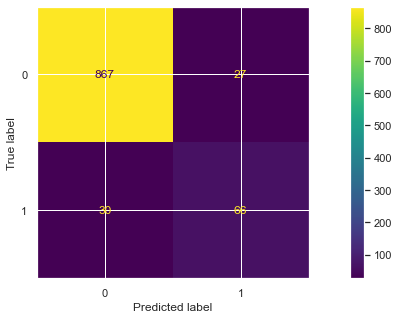

In [182]:
plot_confusion_matrix(logreg_final, X_test_ml_scaler, y_test)

#### Dessision Tree

In [313]:
base_dt = DecisionTreeClassifier()
base_dt.fit(X_train_ml_scaler, y_train)


DecisionTreeClassifier()

In [314]:
#baseline code
evaluate_test(base_dt, X_test_ml_scaler, y_test)

Accuracy: 0.9808080808080808
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       894
           1       0.88      0.93      0.90        96

    accuracy                           0.98       990
   macro avg       0.94      0.96      0.95       990
weighted avg       0.98      0.98      0.98       990

------
Assuming 1 as positive, we get:

True Positive: 89
True Negative: 882
False Positive: 12
False Negative: 7

Precision: 0.8811881188118812
Recall: 0.9270833333333334
F1-Score: 0.9035532994923858
-----


In [185]:
X_train_ml_scaler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 3294 to 4390
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      3958 non-null   float64
 1   Family      3958 non-null   float64
 2   CCAvg       3958 non-null   float64
 3   Education   3958 non-null   float64
 4   Mortgage    3958 non-null   float64
 5   CD Account  3958 non-null   float64
 6   Online      3958 non-null   float64
 7   CreditCard  3958 non-null   float64
dtypes: float64(8)
memory usage: 278.3 KB


In [317]:
# # grid.fit(X_train_ml_scaler, y_train)
# base_dt.best_params_

In [318]:
dt_tuning = DecisionTreeClassifier(max_depth=5)
dt_tuning.fit(X_train_ml_scaler, y_train)


DecisionTreeClassifier(max_depth=5)

In [319]:
evaluate_test(dt_tuning, X_test_ml_scaler, y_test)

Accuracy: 0.9868686868686869
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       894
           1       0.93      0.94      0.93        96

    accuracy                           0.99       990
   macro avg       0.96      0.96      0.96       990
weighted avg       0.99      0.99      0.99       990

------
Assuming 1 as positive, we get:

True Positive: 90
True Negative: 887
False Positive: 7
False Negative: 6

Precision: 0.9278350515463918
Recall: 0.9375
F1-Score: 0.9326424870466321
-----


C:\Users\Eky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


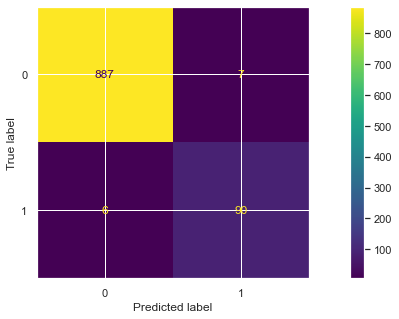

In [320]:
plot_confusion_matrix(dt_tuning, X_test_ml_scaler, y_test)


#### KNN

In [355]:
base_knn = KNeighborsClassifier()
base_knn.fit(X_train_ml_scaler, y_train)

KNeighborsClassifier()

In [356]:
evaluate_test(base_knn,X_test_ml_scaler, y_test)

Accuracy: 0.9737373737373738
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       0.95      0.77      0.85        96

    accuracy                           0.97       990
   macro avg       0.96      0.88      0.92       990
weighted avg       0.97      0.97      0.97       990

------
Assuming 1 as positive, we get:

True Positive: 74
True Negative: 890
False Positive: 4
False Negative: 22

Precision: 0.9487179487179487
Recall: 0.7708333333333334
F1-Score: 0.8505747126436781
-----



#### Hyperparameter KNN

In [361]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier() 

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_ml_scaler, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [362]:
print(grid_search.best_params_)


{'n_neighbors': 5}


In [363]:
knn_tuning = KNeighborsClassifier(n_neighbors=5)
knn_tuning.fit(X_train_ml_scaler, y_train)


KNeighborsClassifier()

In [364]:
evaluate_test(knn_tuning,X_test_ml_scaler, y_test)

Accuracy: 0.9737373737373738
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       0.95      0.77      0.85        96

    accuracy                           0.97       990
   macro avg       0.96      0.88      0.92       990
weighted avg       0.97      0.97      0.97       990

------
Assuming 1 as positive, we get:

True Positive: 74
True Negative: 890
False Positive: 4
False Negative: 22

Precision: 0.9487179487179487
Recall: 0.7708333333333334
F1-Score: 0.8505747126436781
-----


#### Random Forest

 ##### Random Forest Normal

In [325]:
base_rf = RandomForestClassifier()
base_rf.fit(X_train_ml_scaler, y_train)

RandomForestClassifier()

In [327]:
evaluate_test(base_rf)


Accuracy: 0.9838383838383838
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       894
           1       0.94      0.89      0.91        96

    accuracy                           0.98       990
   macro avg       0.97      0.94      0.95       990
weighted avg       0.98      0.98      0.98       990

------
Assuming 1 as positive, we get:

True Positive: 85
True Negative: 889
False Positive: 5
False Negative: 11

Precision: 0.9444444444444444
Recall: 0.8854166666666666
F1-Score: 0.9139784946236558
-----


C:\Users\Eky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


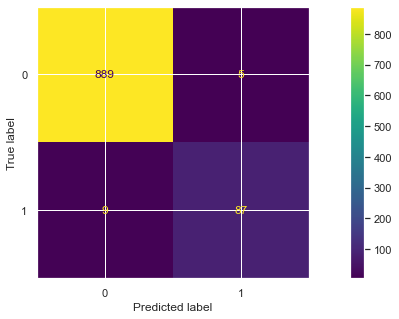

In [198]:
plot_confusion_matrix(base,X_test_ml_scaler, y_test)

#### Random forest Undersampling

In [328]:
X_train_ml_scaler.count()

Income        3958
Family        3958
CCAvg         3958
Education     3958
Mortgage      3958
CD Account    3958
Online        3958
CreditCard    3958
dtype: int64

In [329]:
X_train_ml_scaler.isnull().values.any()


False

In [330]:
print("Sebelum di undersampling:", Counter(y_train))

undersample = RandomUnderSampler(sampling_strategy='majority')
x_train_under_scale, y_train_under_scale = undersample.fit_resample(X_train_ml_scaler,
                                                                    y_train)

print("Sesudah di undersampling:", Counter(y_train_under_scale))


Sebelum di undersampling: Counter({0: 3574, 1: 384})
Sesudah di undersampling: Counter({0: 384, 1: 384})


In [332]:
rf_u = RandomForestClassifier(random_state = 1)
rf_u.fit(x_train_under_scale, y_train_under_scale)
evaluate_test(rf_u, X_test_ml_scaler, y_test)



Accuracy: 0.9656565656565657
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       894
           1       0.75      0.98      0.85        96

    accuracy                           0.97       990
   macro avg       0.87      0.97      0.91       990
weighted avg       0.97      0.97      0.97       990

------
Assuming 1 as positive, we get:

True Positive: 94
True Negative: 862
False Positive: 32
False Negative: 2

Precision: 0.746031746031746
Recall: 0.9791666666666666
F1-Score: 0.846846846846847
-----


C:\Users\Eky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


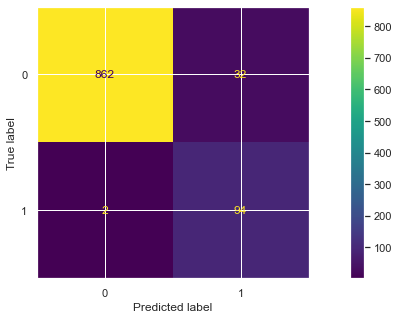

In [333]:
plot_confusion_matrix(rf_u, X_test_ml_scaler, y_test)

##### Random forest oversampling

In [334]:
print("Sebelum di-undersample", Counter(y_train))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_ml_scaler, y_train)

print("Sesudah di-undersample", Counter(y_train_SMOTE))

Sebelum di-undersample Counter({0: 3574, 1: 384})
Sesudah di-undersample Counter({0: 3574, 1: 3574})


In [335]:
rf_o = RandomForestClassifier(random_state = 1, n_jobs = -1)
rf_o.fit(x_train_SMOTE, y_train_SMOTE)
evaluate_test(rf_o, X_test_ml_scaler, y_test)


Accuracy: 0.9848484848484849
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       894
           1       0.89      0.97      0.93        96

    accuracy                           0.98       990
   macro avg       0.94      0.98      0.96       990
weighted avg       0.99      0.98      0.99       990

------
Assuming 1 as positive, we get:

True Positive: 93
True Negative: 882
False Positive: 12
False Negative: 3

Precision: 0.8857142857142857
Recall: 0.96875
F1-Score: 0.9253731343283582
-----


C:\Users\Eky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


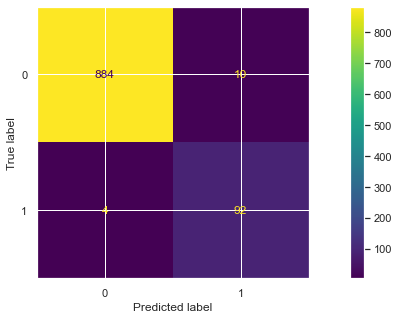

In [206]:
plot_confusion_matrix(rf_o, X_test_ml_scaler, y_test)

#### Random Forest Combining Oversamplind & Undersampling

In [336]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### Combined Model
# define pipeline
combined_model = RandomForestClassifier(n_jobs = -1)
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(X_train_ml_scaler, y_train)
evaluate_test(pipeline, X_test_ml_scaler, y_test)



Accuracy: 0.9848484848484849
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       894
           1       0.89      0.96      0.92        96

    accuracy                           0.98       990
   macro avg       0.94      0.97      0.96       990
weighted avg       0.99      0.98      0.99       990

------
Assuming 1 as positive, we get:

True Positive: 92
True Negative: 883
False Positive: 11
False Negative: 4

Precision: 0.8932038834951457
Recall: 0.9583333333333334
F1-Score: 0.9246231155778895
-----


C:\Users\Eky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


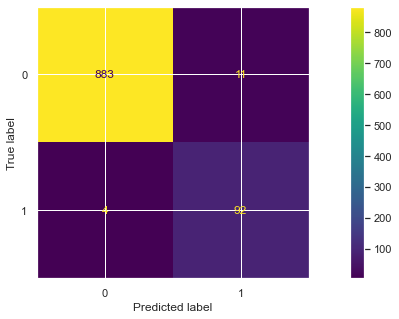

In [337]:
plot_confusion_matrix(pipeline, X_test_ml_scaler, y_test)

**Hasil Modeling**

Logistic


* Accuracy: 0.9414141414141414

* True Positive: 65
* True Negative: 867
* False Positive: 27
* False Negative: 31

* Precision: 0.7065217391304348
* Recall: 0.6770833333333334
* F1-Score: 0.6914893617021278

==============================================


Logistic Tuning

* Accuracy: 0.9424242424242424

* True Positive: 66
* True Negative: 867
* False Positive: 27
* False Negative: 30

* Precision: 0.7096774193548387
* Recall: 0.6875
* F1-Score: 0.6984126984126984

================================================

KNN 

0.9737373737373738

* True Positive: 74
* True Negative: 890
* False Positive: 4
* False Negative: 22

* Precision: 0.9487179487179487
* Recall: 0.7708333333333334
* F1-Score: 0.8505747126436781


====================================================


KNN Tuning

Accuracy: 0.9737373737373738

* True Positive: 74
* True Negative: 890
* False Positive: 4
* False Negative: 22

* Precision: 0.9487179487179487
* Recall: 0.7708333333333334
* F1-Score: 0.8505747126436781

================================================

Decision Tree 

* Accuracy: 0.9808080808080808

* True Positive: 89
* True Negative: 882
* False Positive: 12
* False Negative: 7


================================================

Decision Tree Tuning

* Accuracy: 0.9868686868686869

* True Positive: 90
* True Negative: 887
* False Positive: 7
* False Negative: 6

* Precision: 0.9278350515463918
* Recall: 0.9375
* F1-Score: 0.9326424870466321

================================================

Random Forest

* Accuracy: 0.9838383838383838
* True Positive: 85
* True Negative: 889
* False Positive: 5
* False Negative: 11

* Precision: 0.9444444444444444
* Recall: 0.8854166666666666
* F1-Score: 0.9139784946236558

================================================

Random Forest Undersampling

* Accuracy: 0.9656565656565657

* True Positive: 94
* True Negative: 862
* False Positive: 32
* False Negative: 2

* Precision: 0.746031746031746
* Recall: 0.9791666666666666
* F1-Score: 0.846846846846847

================================================

Random Forest Oversampling

* Accuracy: 0.9848484848484849
* True Positive: 93
* True Negative: 882
* False Positive: 12
* False Negative: 3

* Precision: 0.8857142857142857
* Recall: 0.96875
* F1-Score: 0.9253731343283582

================================================

Random Forest Kombinasi Under + Over

* Accuracy: 0.9848484848484849
* True Positive: 92
* True Negative: 883
* False Positive: 11
* False Negative: 4

* Precision: 0.8932038834951457
* Recall: 0.9583333333333334
* F1-Score: 0.9246231155778895

================================================

**Kesimpulan Model**

* Dalam kasus ini adalah untuk meminimalisir false negative sehingga dipanggil recall  terbesar, namun perlu diperhatikan juga Presisio dan F1 Score
* model yang memiliki nilai recall besar dan sekaligus presiion + F1 terbaik adalah Decision Tree dengan score Precision: 0.9278350515463918,  Recall: 0.9375, F1-Score: 0.9326424870466321

    



**Implementasi Model ke Bisnis**

Confusion Matrix :
1 (positive : dapet loan, personal loan), 0 : (negative : tidak dapat loan)
TP, TN, FP, FN -> P : positif , N : Negatif, T : True, F : False
Jangan pakai akurasi untuk pertimbangan modelnya bagus atau tidak.
FN : Prediksi negatif ( tidak dapet loan ) tapi faktanya false ( data actual (y_test) dapet personal loan (nasabah lancar) )
-> Kalau FN banyak nilainya, maka Recall kecil (Recall = tp/tp+fn) alhasil kita sebagai pemilik bank ga dapet banyak untung
FP : Prediksi positif ( dapet persona loan ) tapi faktanya false ( data actual (y_test) tidak dapet personal loan (nasabah bad)), FP banyak nilainya, maka presisi kecil (presisi = tp/tp+fp) alhasil kita salah memberikan saran loan kepada nasabah jelek, bisa jadi dan kemungkinan besar dapet kerugian karena nasabahnya telat bayar.
misal : 

True Positive: 90
True Negative: 887
False Positive: 7 (1 : positive)
False Negative: 6
Precision: 0.9278350515463918
Recall: 0.9375
F1-Score: 0.9326424870466321

Asumsi satu orang mendapatkan Loan : 50 jt, setahun bunganya 5% -> bank dalam setaun dapet keuntungan sebesar 2,5jt dan asumsinya lunas dalam setahun pembayaran untuk semua nasabah.

TP : 90, artinya 52,5jt * 90 orang = 4,725 M kelebihan uang dalam setaun + pokok utang (lancar banget bayarnya)


TN : 887, artinya (50jt * 887) + (2,5jt * 887) = 44.350.000.000 + 2.217.500.000 = 46.567.500.000 (46 Milyar) (menghindari kerugian sebesar 4,656 M)

FN : 6, artinya 6 * 52,5jt = 315jt (artinya kita tidak mendapat potensi keuntungan setaun segini)


FP : 7, artinya 7 * 52,5jt = 367,5 jt kita gagal memperoleh kelebihan uang (FP : ga pernah bayar sama sekali)

Uang yang kita akan terima itu dari TP dan FP :
setahun potensi untungnya : 4,725 M - 367,5jt = 4.357.500.000 = 4,357 M

### Variable Importance Machine Learning

In [341]:
# import dalex to explain complex model
import dalex as dx
import warnings
warnings.filterwarnings('ignore')

In [342]:
## initiate explainer for the best model (based on value in recall and precision)
loan_interpretasion = dx.Explainer(dt_tuning, X_train_ml_scaler, y_train, label = "Decision Tree Interpretation")

Preparation of a new explainer is initiated

  -> data              : 3958 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3958 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Decision Tree Interpretation
  -> predict function  : <function yhat_proba_default at 0x00000160EF366C10> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.097, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.676, mean = -2.24e-19, max = 0.933
  -> model_info        : package sklearn

A new explainer has been created!


In [343]:
# visualize permutation feature importance for the best model
loan_interpretasion.model_parts().plot()

Variable penting dalam Decision Tree adalah : Income, education, Family, CCAvg dan CD Account